<a href="https://colab.research.google.com/github/ranjita-raj9/Global-Terrorism-Analysis/blob/main/Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# In our overview of terrorism, we tried to understand how the number of terrorists acts varies around the world and how it has changed over time.To do this, we needed a clear and massive amount of terrorists attack that happened over time.What we are doing here is we are understanding the data set given to us and analysing eveything related to terrorists attack and giving insights about our observation through this exploratory data analysis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# We are using different python libraries like pandas,numpy,seaborn to do this analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Copy of Global Terrorism Data (1).csv",encoding="latin1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# df = df.replace(r'?', np.NaN)                                                   
# df = df.replace(r'n.a', np.NaN)                                              

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.columns.to_list()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

# As per our observation through data sets we came across many null values.so we refined the data as per our requirement.

In [ ]:
attack=df[['iyear','imonth','iday','country_txt','region_txt','city','success','claimed','suicide','attacktype1_txt','targtype1_txt','extended','targsubtype1_txt','gname','motive','weaptype1_txt','nkill','nwound','property','nhostkid','vicinity','weapsubtype1_txt']]
attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   imonth            181691 non-null  int64  
 2   iday              181691 non-null  int64  
 3   country_txt       181691 non-null  object 
 4   region_txt        181691 non-null  object 
 5   city              181257 non-null  object 
 6   success           181691 non-null  int64  
 7   claimed           115571 non-null  float64
 8   suicide           181691 non-null  int64  
 9   attacktype1_txt   181691 non-null  object 
 10  targtype1_txt     181691 non-null  object 
 11  extended          181691 non-null  int64  
 12  targsubtype1_txt  171318 non-null  object 
 13  gname             181691 non-null  object 
 14  motive            50561 non-null   object 
 15  weaptype1_txt     181691 non-null  object 
 16  nkill             17

In [ ]:
attack.shape
attack.tail()

,iyear,imonth,iday,country_txt,region_txt,city,success,claimed,suicide,attacktype1_txt,...,targsubtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,property,nhostkid,vicinity,weapsubtype1_txt
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,1,1.0,0,Armed Assault,...,Military Checkpoint,Al-Shabaab,NaN,Firearms,1.0,2.0,-9,NaN,0,Unknown Gun Type
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,1,0.0,0,Bombing/Explosion,...,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,NaN,Explosives,2.0,7.0,1,NaN,1,"Projectile (rockets, mortars, RPGs, etc.)"
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,1,0.0,0,Facility/Infrastructure Attack,...,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0,1,NaN,0,Arson/Fire
181689,2017,12,31,India,South Asia,Imphal,0,0.0,0,Bombing/Explosion,...,Government Building/Facility/Office,Unknown,NaN,Explosives,0.0,0.0,-9,NaN,0,Grenade
181690,2017,12,31,Philippines,Southeast Asia,Cotabato City,0,0.0,0,Bombing/Explosion,...,NaN,Unknown,NaN,Explosives,0.0,0.0,0,NaN,0,Unknown Explosive Type


In [ ]:
attack.isna().sum()

iyear                    0
imonth                   0
iday                     0
country_txt              0
region_txt               0
city                   434
success                  0
claimed              66120
suicide                  0
attacktype1_txt          0
targtype1_txt            0
extended                 0
targsubtype1_txt     10373
gname                    0
motive              131130
weaptype1_txt            0
nkill                10313
nwound               16311
property                 0
nhostkid            168119
vicinity                 0
weapsubtype1_txt     20768
dtype: int64

# As we saw there are null values presents we filled the null values to zero so that we can compare and analyse that values with others.

In [ ]:
attack[['city','targsubtype1_txt','motive','nkill','nwound','nhostkid','claimed','weapsubtype1_txt']]=attack[['city','targsubtype1_txt','motive','nkill','nwound','nhostkid','claimed','weapsubtype1_txt']].fillna(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
attack.isnull().sum()



iyear               0
imonth              0
iday                0
country_txt         0
region_txt          0
city                0
success             0
claimed             0
suicide             0
attacktype1_txt     0
targtype1_txt       0
extended            0
targsubtype1_txt    0
gname               0
motive              0
weaptype1_txt       0
nkill               0
nwound              0
property            0
nhostkid            0
vicinity            0
weapsubtype1_txt    0
dtype: int64

# 1.Year wise terrorist attack

 First thing what we are doing here is we are comparing the number of terrorist attacks with years(1970 to 2017).

In [ ]:
Attacks=attack["iyear"].value_counts().sort_index().to_frame().reset_index().rename(columns={"index":"year","year":"Attack"}).set_index("year")
Attacks.head()

,iyear
year,
1970,651
1971,471
1972,568
1973,473
1974,581


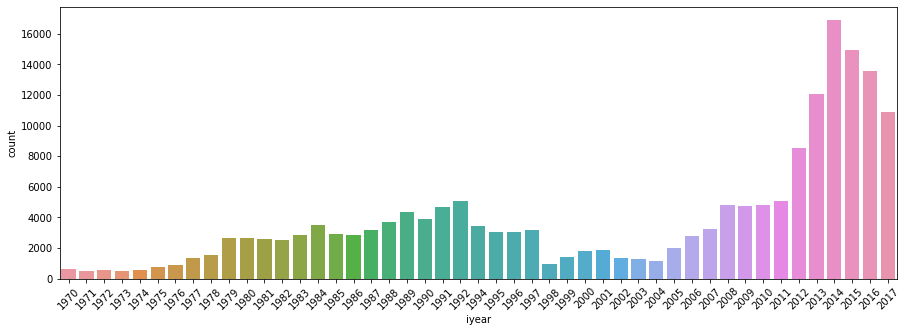

In [ ]:
# Attacks.plot(kind="bar",color="red",figsize=(15,6))
# plt.title("Attack per wise")
# # #plt.xlabel("years")
# plt.ylabel("number of attacks")
# plt.show()
plt.figure(figsize=(15,5))
sns.countplot(x=attack.iyear)
plt.xticks(rotation=45)
plt.show()

# According to this graph we saw that year 2014 has highest number of attacks and the year 1971 has the lowest number of attacks

# Month wise Analysis

In [ ]:
monthwise_attacks=attack.drop(attack[(attack["imonth"]==0)|(attack["iday"]==0)].index)
monthwise_attacks

,iyear,imonth,iday,country_txt,region_txt,city,success,claimed,suicide,attacktype1_txt,...,targsubtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,property,nhostkid,vicinity,weapsubtype1_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0.0,0,Assassination,...,Named Civilian,MANO-D,0,Unknown,1.0,0.0,0,0.0,0,0
5,1970,1,1,United States,North America,Cairo,1,0.0,0,Armed Assault,...,"Police Building (headquarters, station, school)",Black Nationalists,To protest the Cairo Illinois Police Deparment,Firearms,0.0,0.0,1,0.0,0,Unknown Gun Type
6,1970,1,2,Uruguay,South America,Montevideo,0,0.0,0,Assassination,...,Police Security Forces/Officers,Tupamaros (Uruguay),0,Firearms,0.0,0.0,0,0.0,0,Automatic or Semi-Automatic Rifle
7,1970,1,2,United States,North America,Oakland,1,0.0,0,Bombing/Explosion,...,Electricity,Unknown,0,Explosives,0.0,0.0,1,0.0,0,Unknown Explosive Type
8,1970,1,2,United States,North America,Madison,1,1.0,0,Facility/Infrastructure Attack,...,Military Recruiting Station/Academy,New Year's Gang,To protest the War in Vietnam and the draft,Incendiary,0.0,0.0,1,0.0,0,Molotov Cocktail/Petrol Bomb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,1,1.0,0,Armed Assault,...,Military Checkpoint,Al-Shabaab,0,Firearms,1.0,2.0,-9,0.0,0,Unknown Gun Type
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,1,0.0,0,Bombing/Explosion,...,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,0,Explosives,2.0,7.0,1,0.0,1,"Projectile (rockets, mortars, RPGs, etc.)"
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,1,0.0,0,Facility/Infrastructure Attack,...,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),0,Incendiary,0.0,0.0,1,0.0,0,Arson/Fire
181689,2017,12,31,India,South Asia,Imphal,0,0.0,0,Bombing/Explosion,...,Government Building/Facility/Office,Unknown,0,Explosives,0.0,0.0,-9,0.0,0,Grenade


In [ ]:
monthwise=pd.DataFrame(monthwise_attacks,columns=["imonth"])
monthwise=monthwise.groupby(["imonth"])["imonth"].count().reset_index(name="month_count")
monthwise


,imonth,month_count
0,1,14842
1,2,13817
2,3,15195
3,4,15072
4,5,16809
5,6,15295
6,7,16217
7,8,15733
8,9,14099
9,10,15474


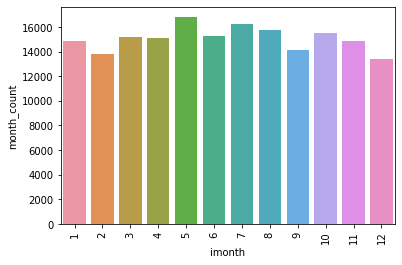

In [ ]:
sns.barplot(x="imonth",y="month_count",data=monthwise)
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(rotation=90)
plt.ylabel=("number of attacks")



# 2.   Which region has most terrorist attacks




In [ ]:
reg=pd.crosstab(attack.iyear,attack.region_txt)

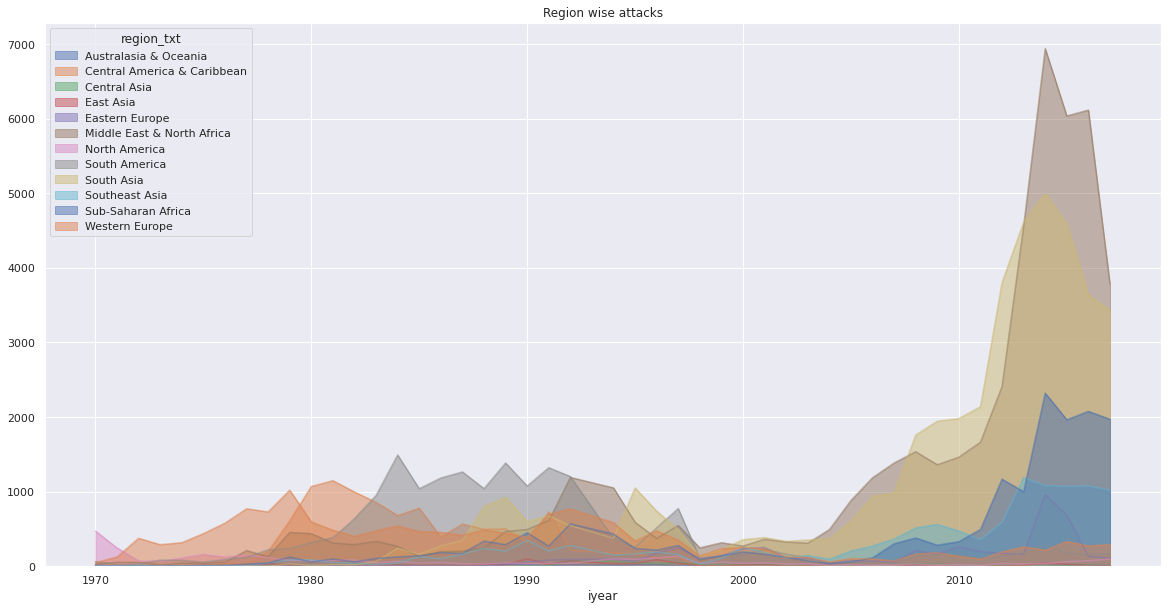

In [ ]:
reg.plot(kind="area",stacked=False,alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks")
plt.xlabel=("years")
#plt.ylabel("Numbers of attacks",fontsize=20)
plt.show()

This graph shows which region has highest and lowest attacks.

#3. Region wise successful and unsuccessfull attacks

In [ ]:
success_rate = attack.groupby(['region_txt','success'])['region_txt'].count().unstack()
success_rate

success,0,1
region_txt,,
Australasia & Oceania,42,240
Central America & Caribbean,365,9979
Central Asia,58,505
East Asia,122,680
Eastern Europe,707,4437
Middle East & North Africa,6155,44319
North America,562,2894
South America,1358,17620
South Asia,5605,39369


Text(0.5, 1.0, 'Number of successfull attack')

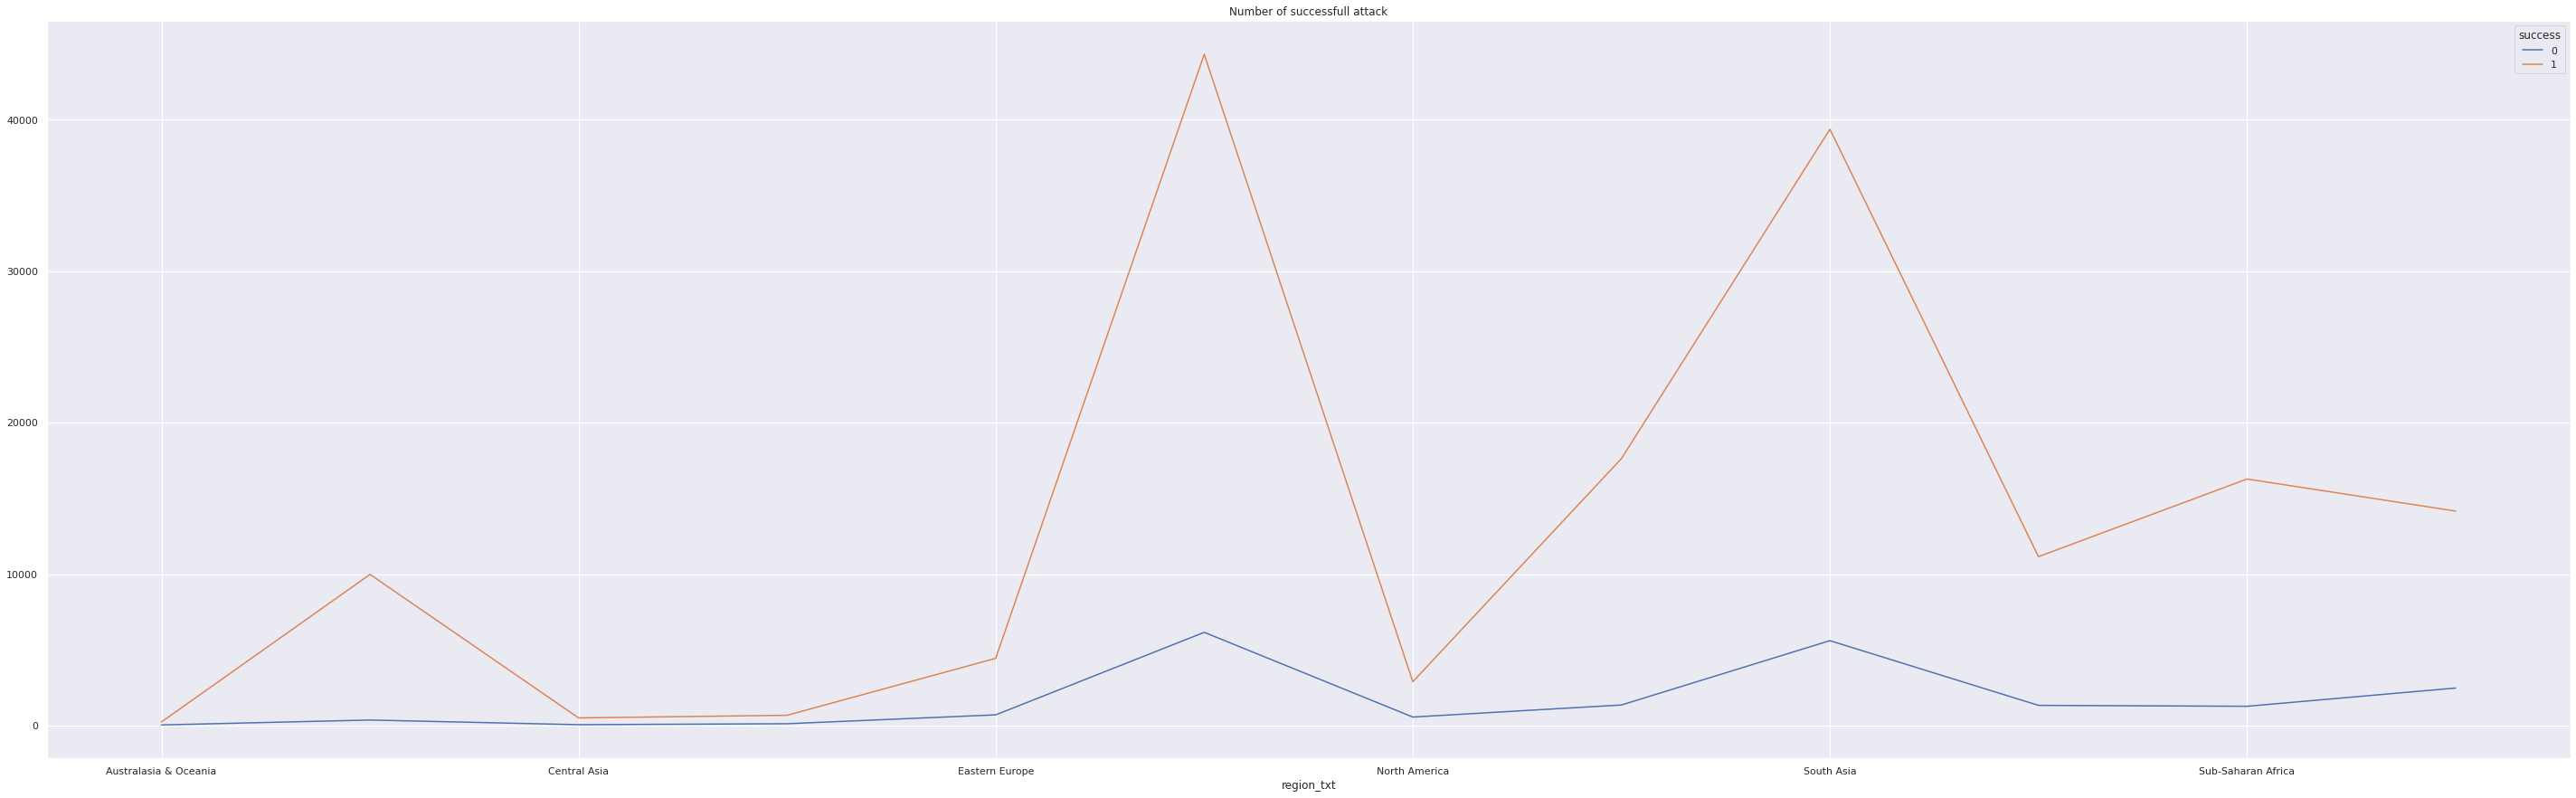

In [ ]:
plt.rcParams['figure.figsize'] = (50, 15)
success_rate.plot()
plt.title('Number of successfull attack')
#plt.ylabel('Number of attack')
#plt.xlabel('region')


# 4.which country has been attacked most by the terrorist

In [ ]:
no_of_attacked_country=attack.country_txt.value_counts()[:10]
no_of_attacked_country.head()

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: country_txt, dtype: int64

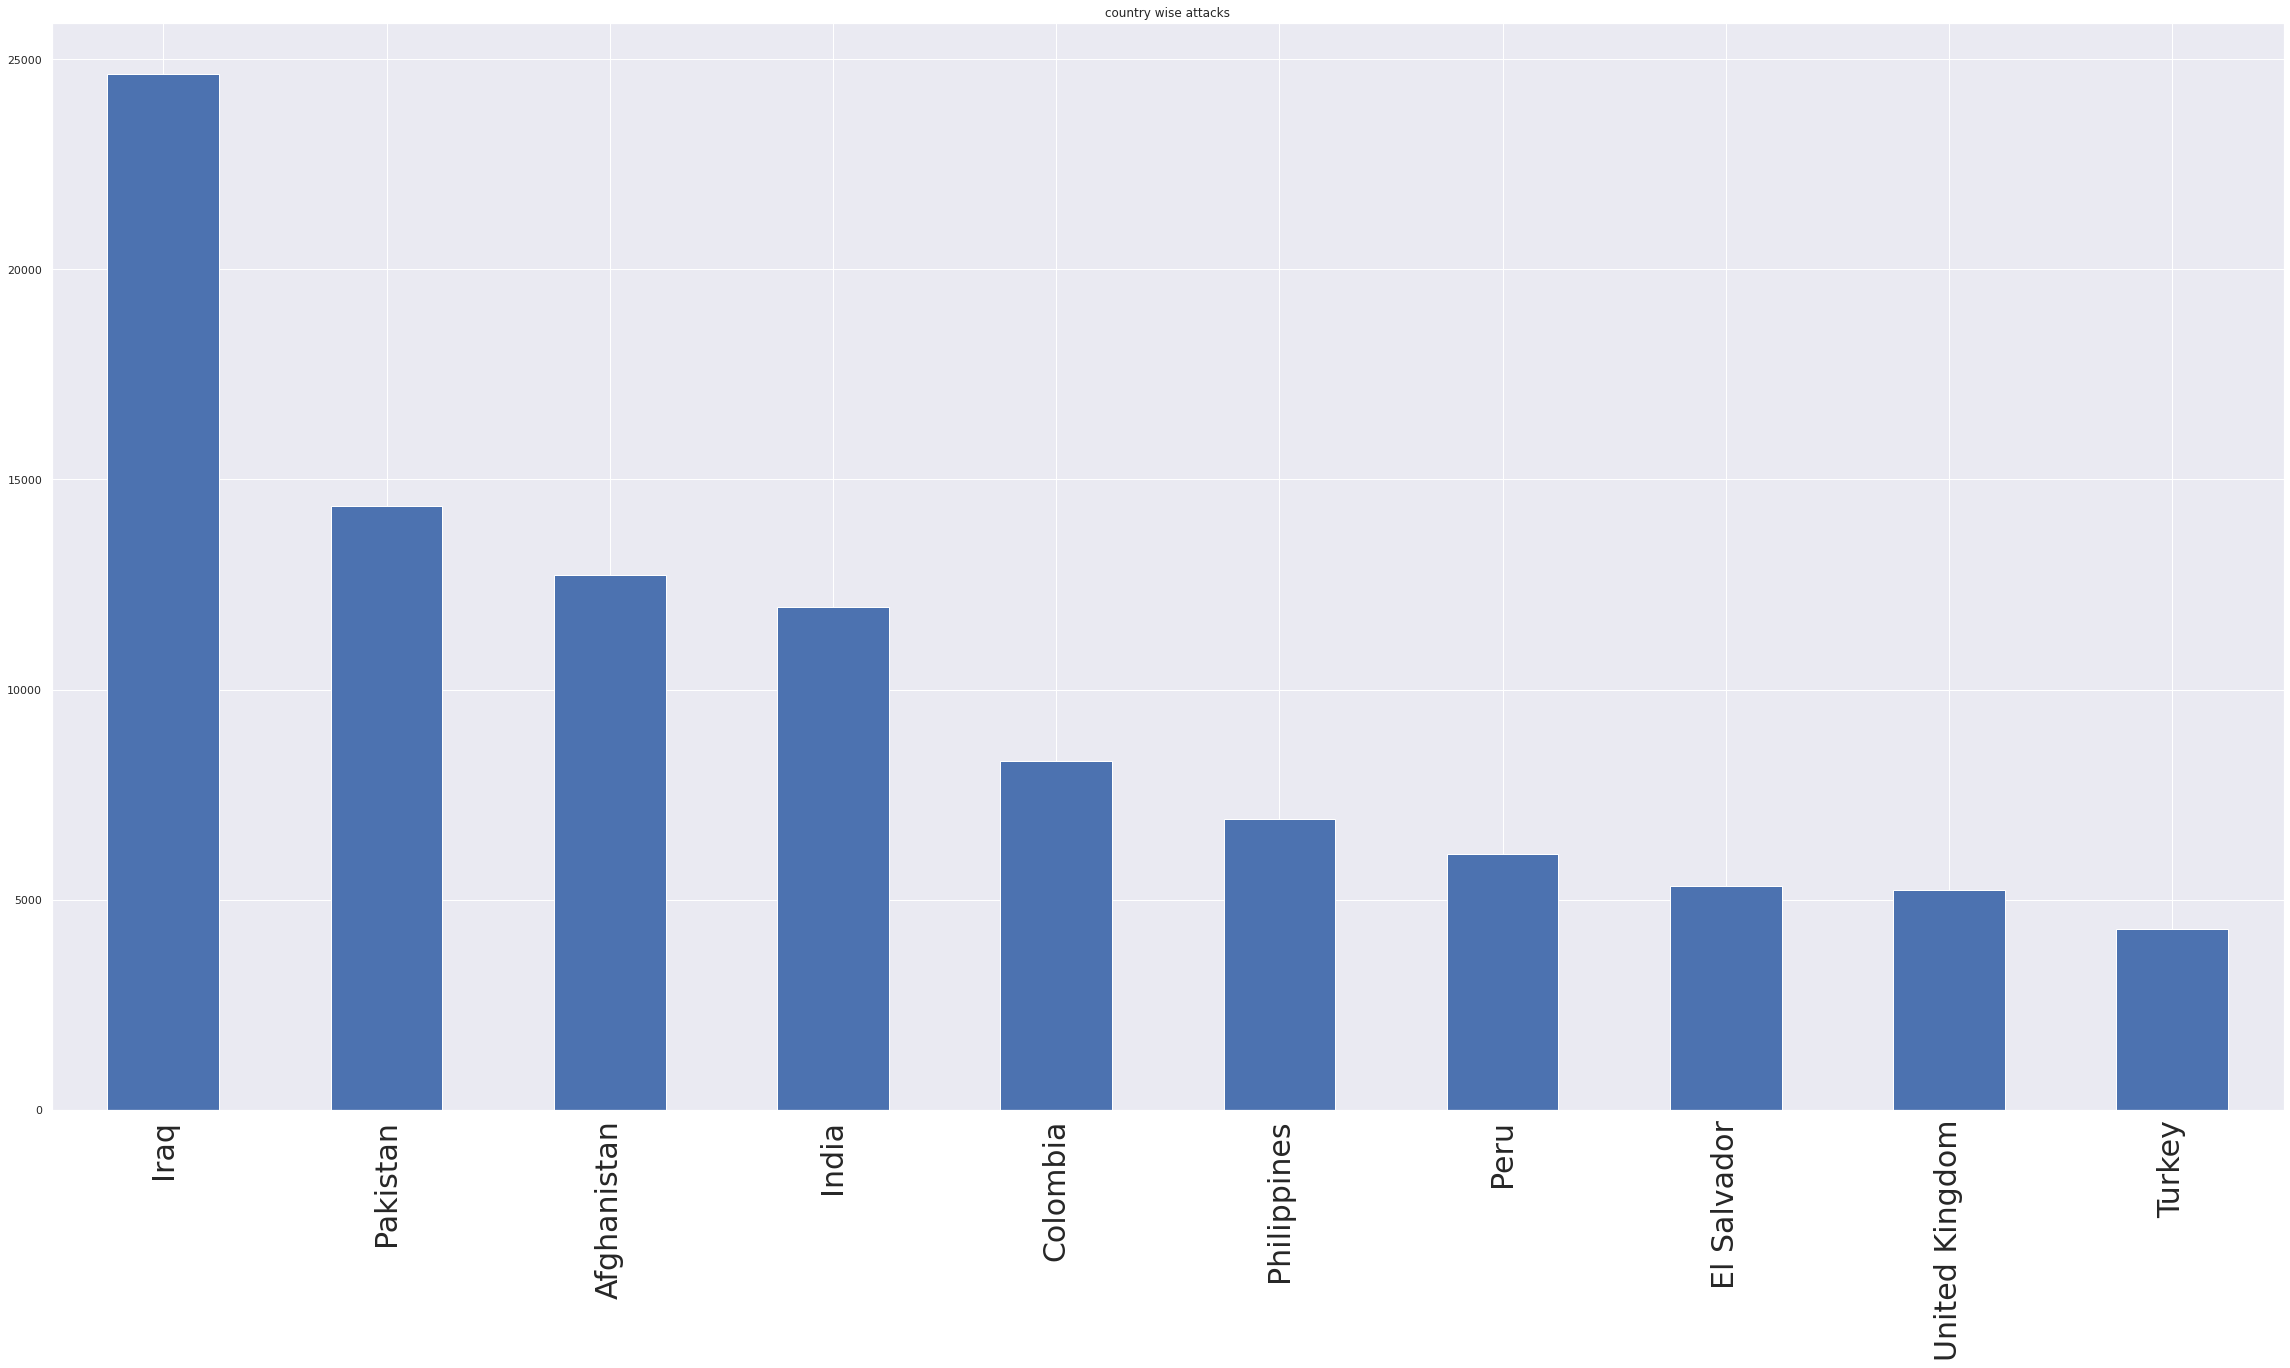

In [ ]:
no_of_attacked_country.plot(kind='bar',figsize=(40,20))
plt.title("country wise attacks")
#plt.xlabel=("countries",fontsize=10)
plt.xticks(fontsize=30)
#plt.ylabel("number of attacks")
plt.show()


# 5.Country wise successful and unsuccessfull attacks

In [ ]:
success_rate_country = attack.groupby(['country_txt','success'])['country_txt'].count().unstack()
a=success_rate_country[:10]

Text(0, 0.5, 'Number of attack')

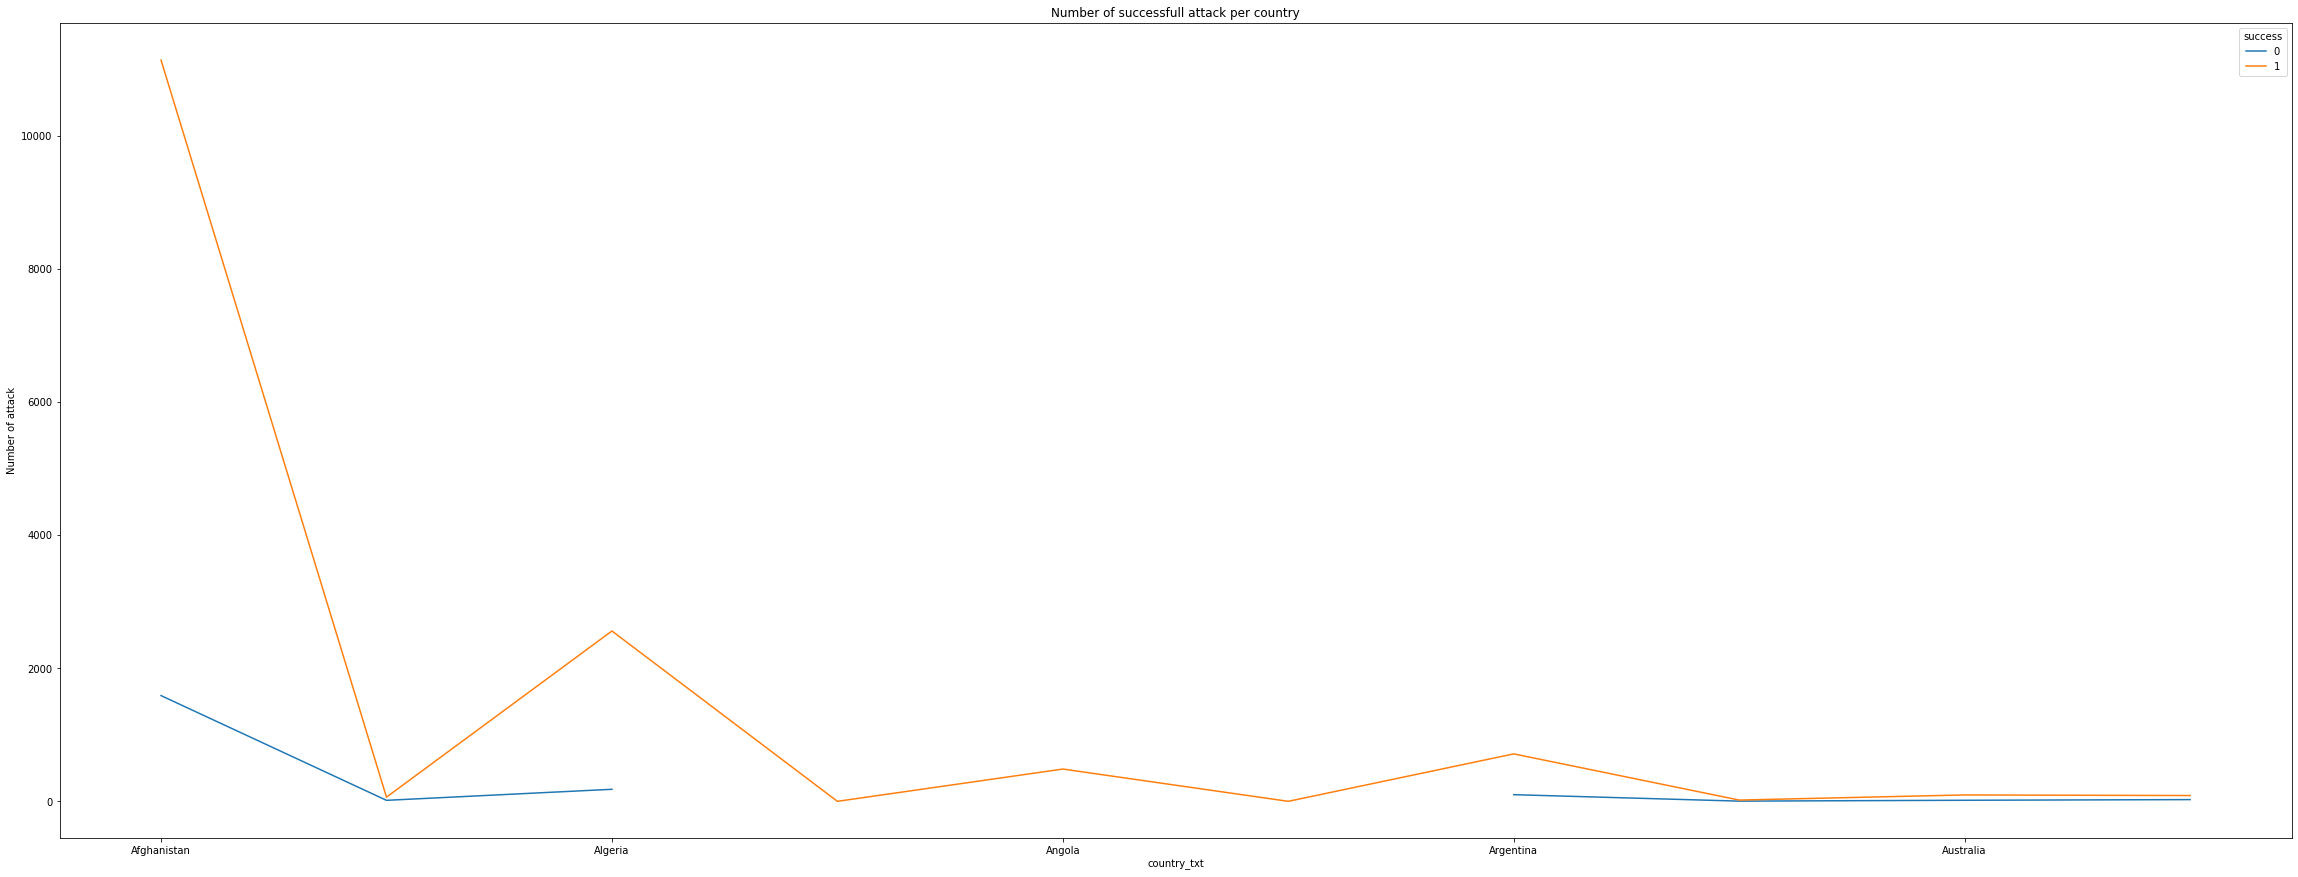

In [ ]:
plt.rcParams['figure.figsize'] = (40, 15)
a.plot()
plt.title('Number of successfull attack per country')
plt.ylabel('Number of attack')
#plt.xlabel('region')

# 6.which city has been attacked most by the terrorist

In [ ]:
City=attack["city"].value_counts()[:10]
City

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64

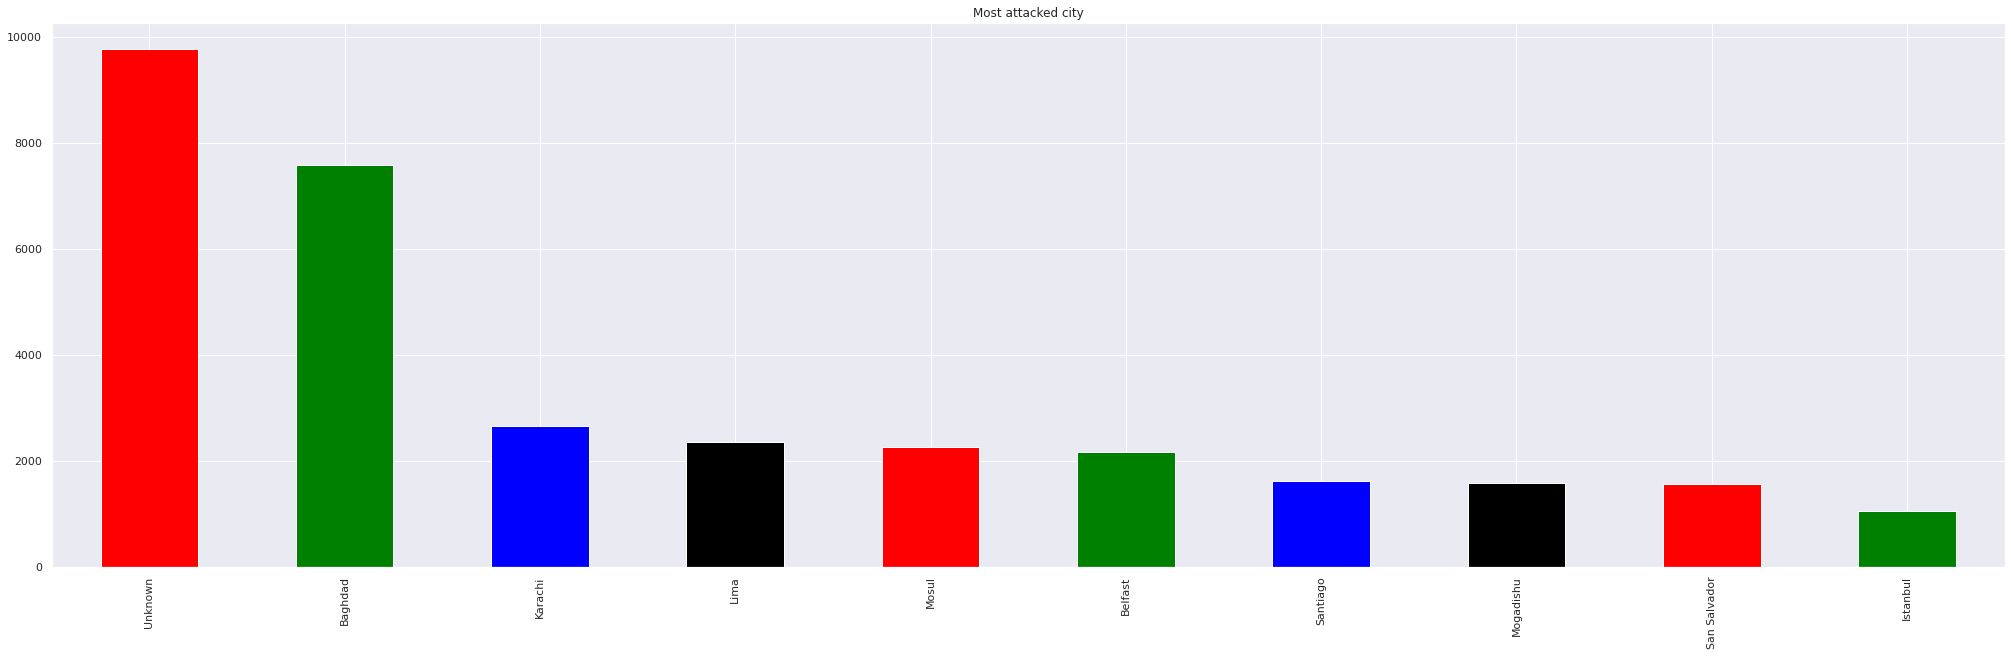

In [ ]:
my_colors = ['red', 'green', 'blue', 'black']

City.plot(kind='bar',figsize=(35,10),color=my_colors)
plt.title('Most attacked city')
#plt.ylabel('Total number ')
#plt.xlabel('City name')
plt.show()

# 7.City wise successful and unsuccessfull attacks

In [ ]:
success_rate_city = attack.groupby(['city','success'])['city'].count().unstack()[:10]
success_rate_city 


Text(0, 0.5, 'Number of attack')

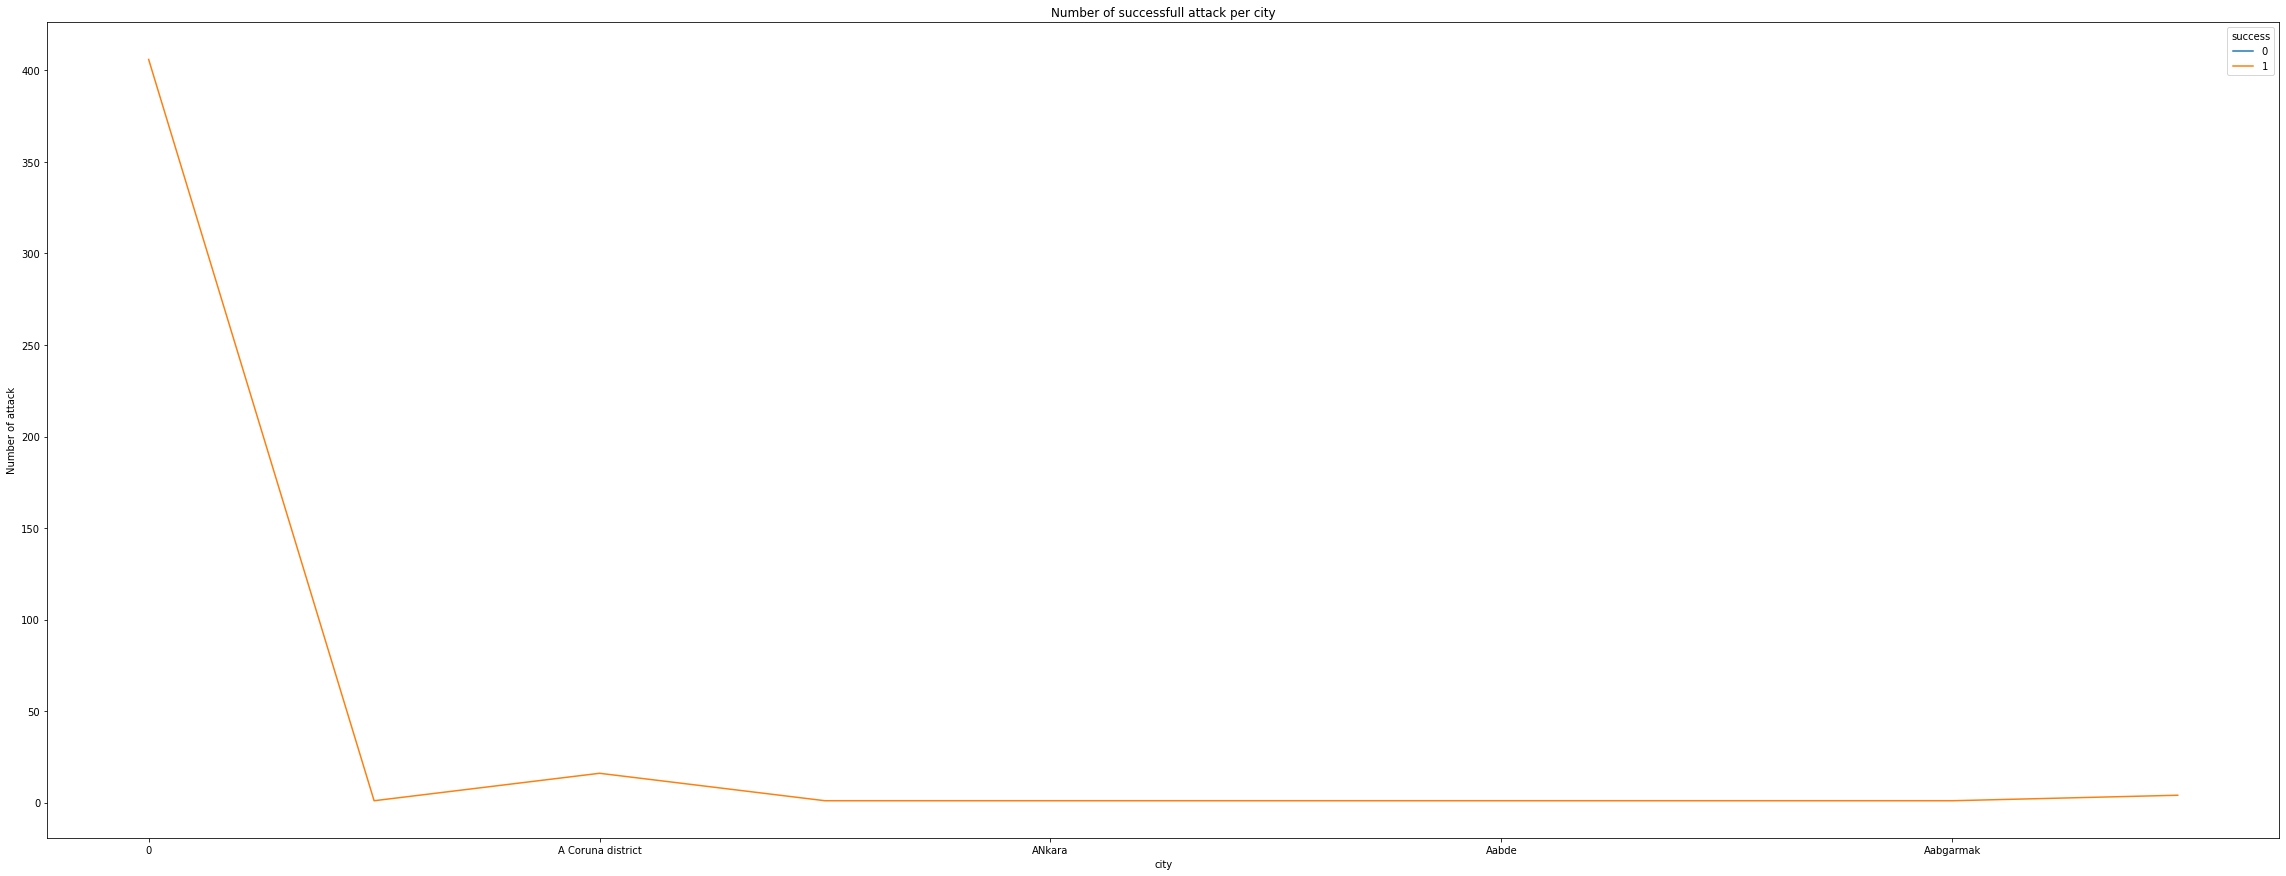

In [ ]:
plt.rcParams['figure.figsize'] = (40, 15)
success_rate_city .plot()
plt.title('Number of successfull attack per city')
plt.ylabel('Number of attack')
#plt.xlabel('region')

# 8.Most dangerous Gang

In [ ]:
terrific_gang=attack.gname.value_counts()[:10].reset_index()
terrific_gang

,index,gname
0,Unknown,82782
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
5,Al-Shabaab,3288
6,New People's Army (NPA),2772
7,Irish Republican Army (IRA),2671
8,Revolutionary Armed Forces of Colombia (FARC),2487
9,Boko Haram,2418


In [ ]:
gang_name=terrific_gang.loc[:,'index']
count=terrific_gang.loc[:,'gname']

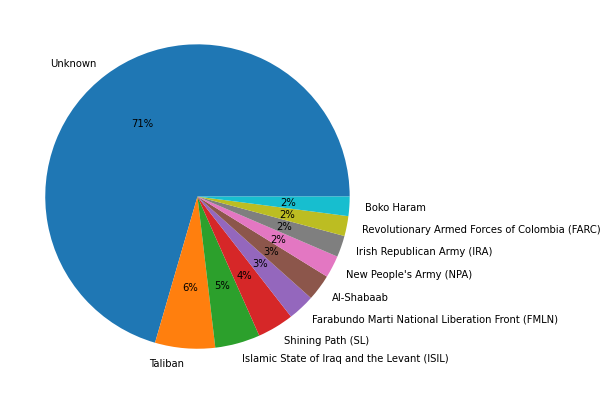

In [ ]:
fig=plt.figure(figsize=(10,7))
plt.pie(count,labels=gang_name,autopct='%.0f%%')
plt.show()

# success ratio of extended,success,suicide,claimed,property,vicinity

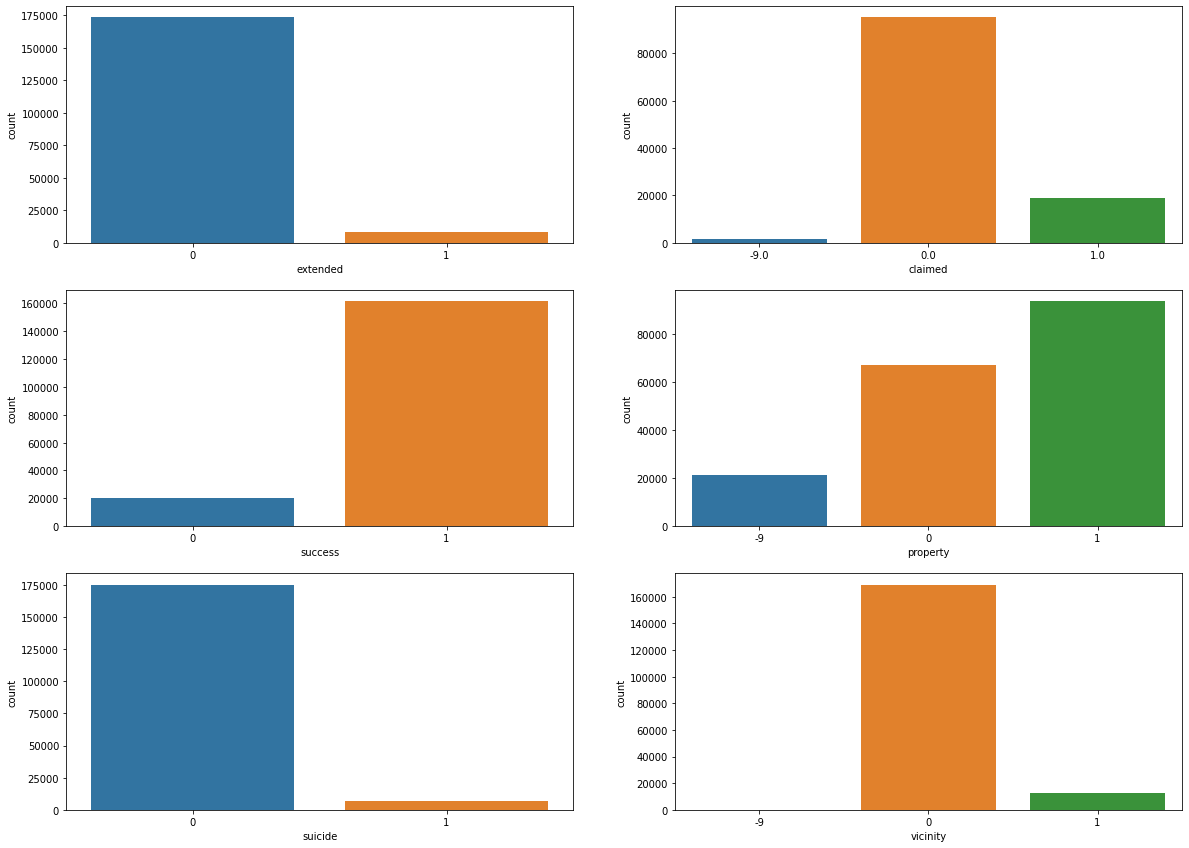

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.countplot(x=attack.extended)
plt.subplot(4,2,3)
sns.countplot(x=attack.success)
plt.subplot(4,2,5)
sns.countplot(x=attack.suicide)
plt.subplot(4,2,2)
sns.countplot(x=attack.claimed)
plt.subplot(4,2,4)
sns.countplot(x=attack.property)
plt.subplot(4,2,6)
sns.countplot(x=attack.vicinity)
plt.show()

# 9.Mode of attack used by terrorists

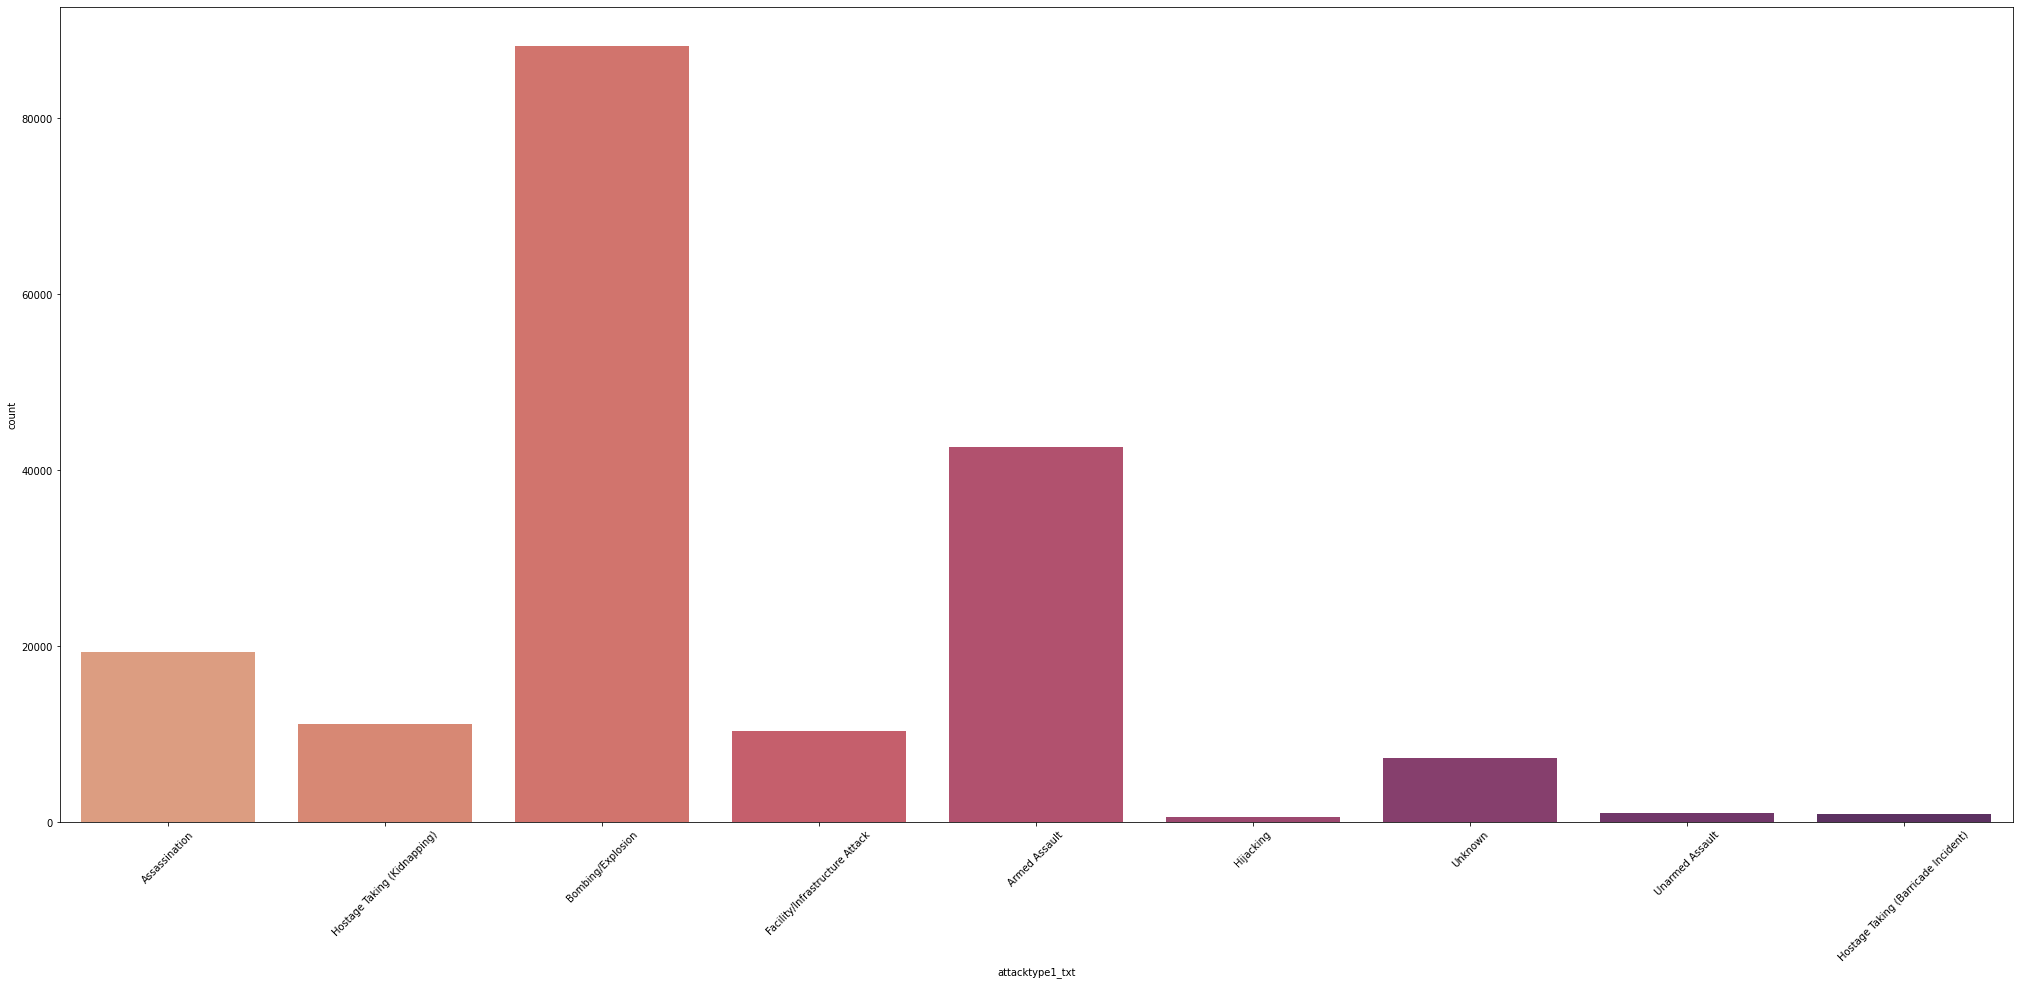

In [ ]:
plt.figure(figsize=(35,15))
sns.countplot(x=attack. attacktype1_txt,palette='flare')
plt.xticks(rotation=45)
plt.show()




# 10.   Which weapons and subweapons is used by terrorist



In [ ]:
Weapon=attack.weaptype1_txt.value_counts()
Weapon

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

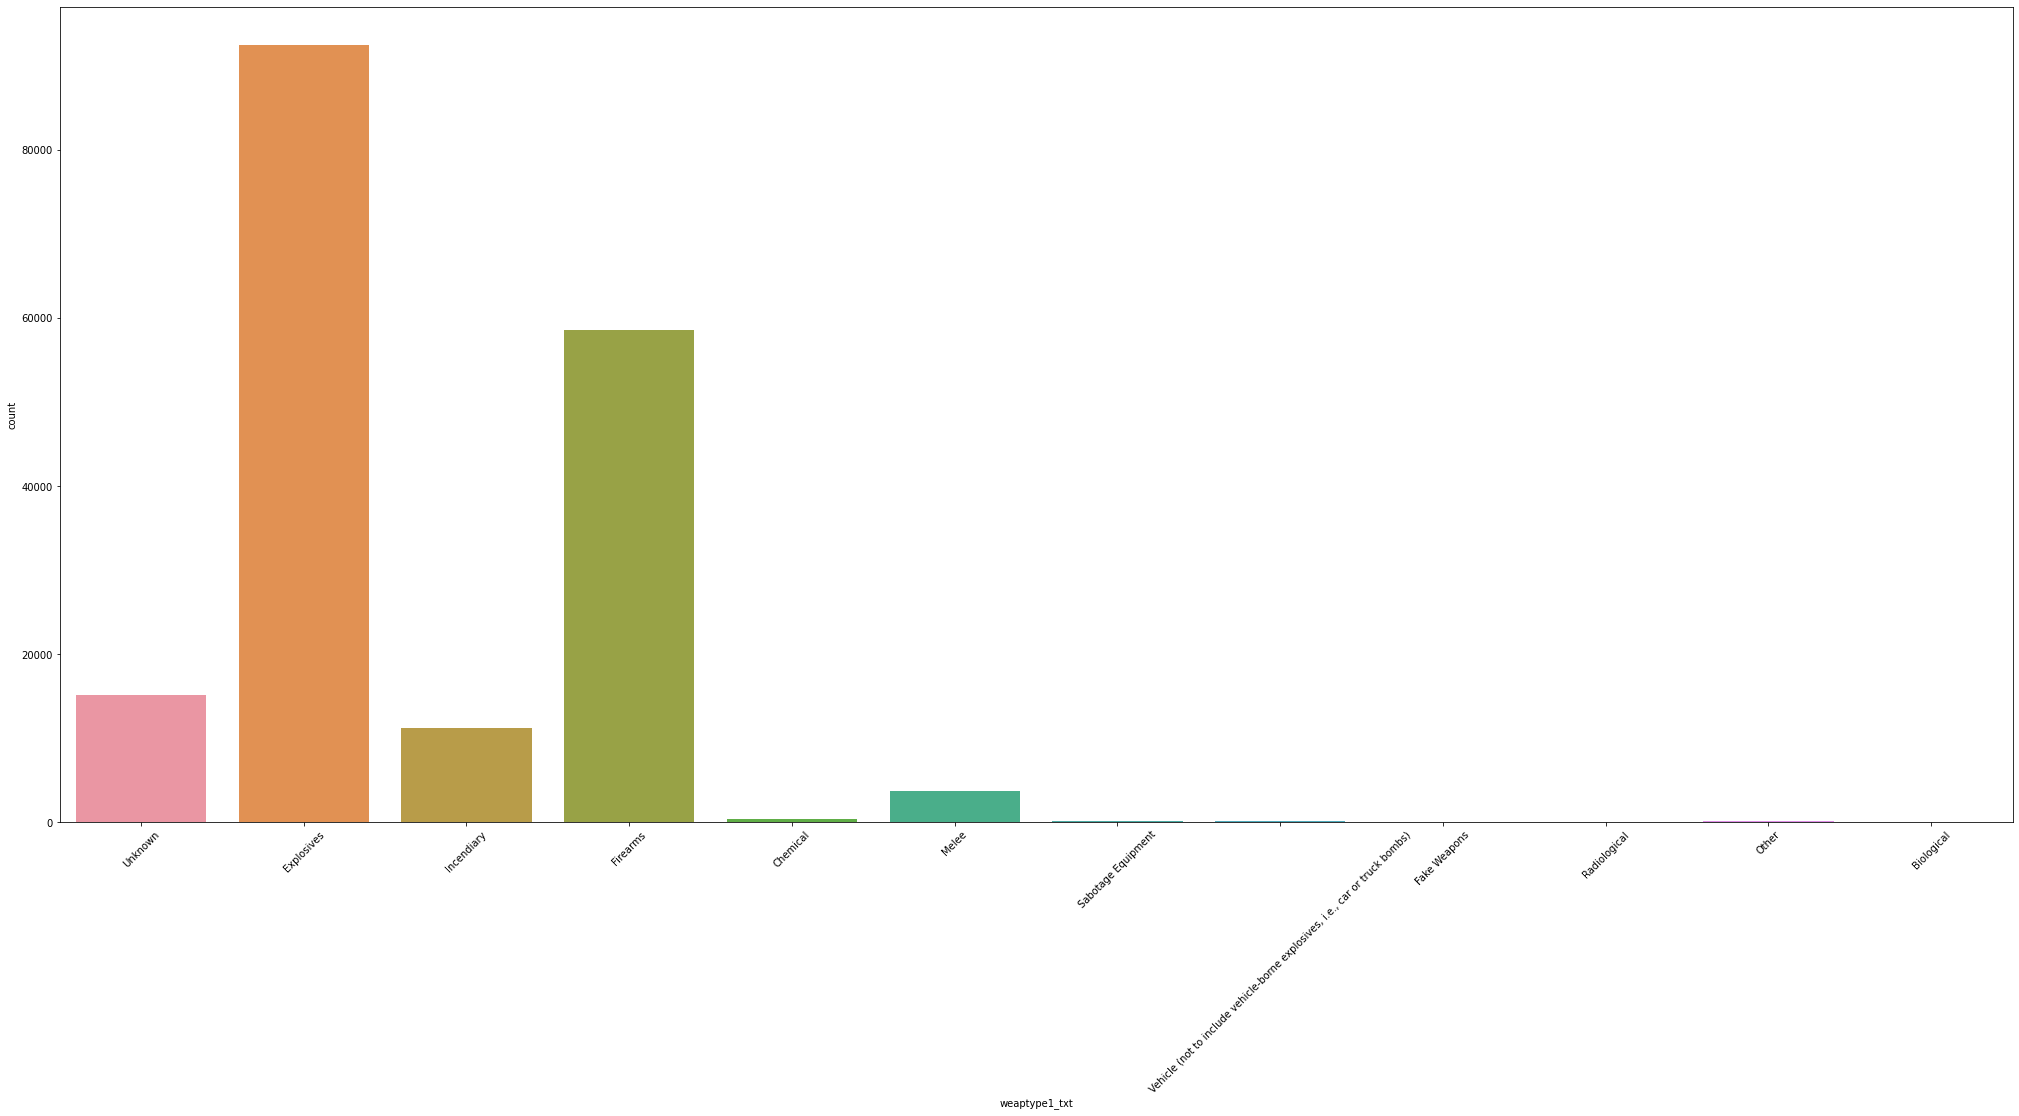

In [ ]:
plt.figure(figsize=(35,15))
sns.countplot(x=attack.weaptype1_txt)
plt.xticks(rotation=45)
plt.show()

# Weapon subtype used by terrorist

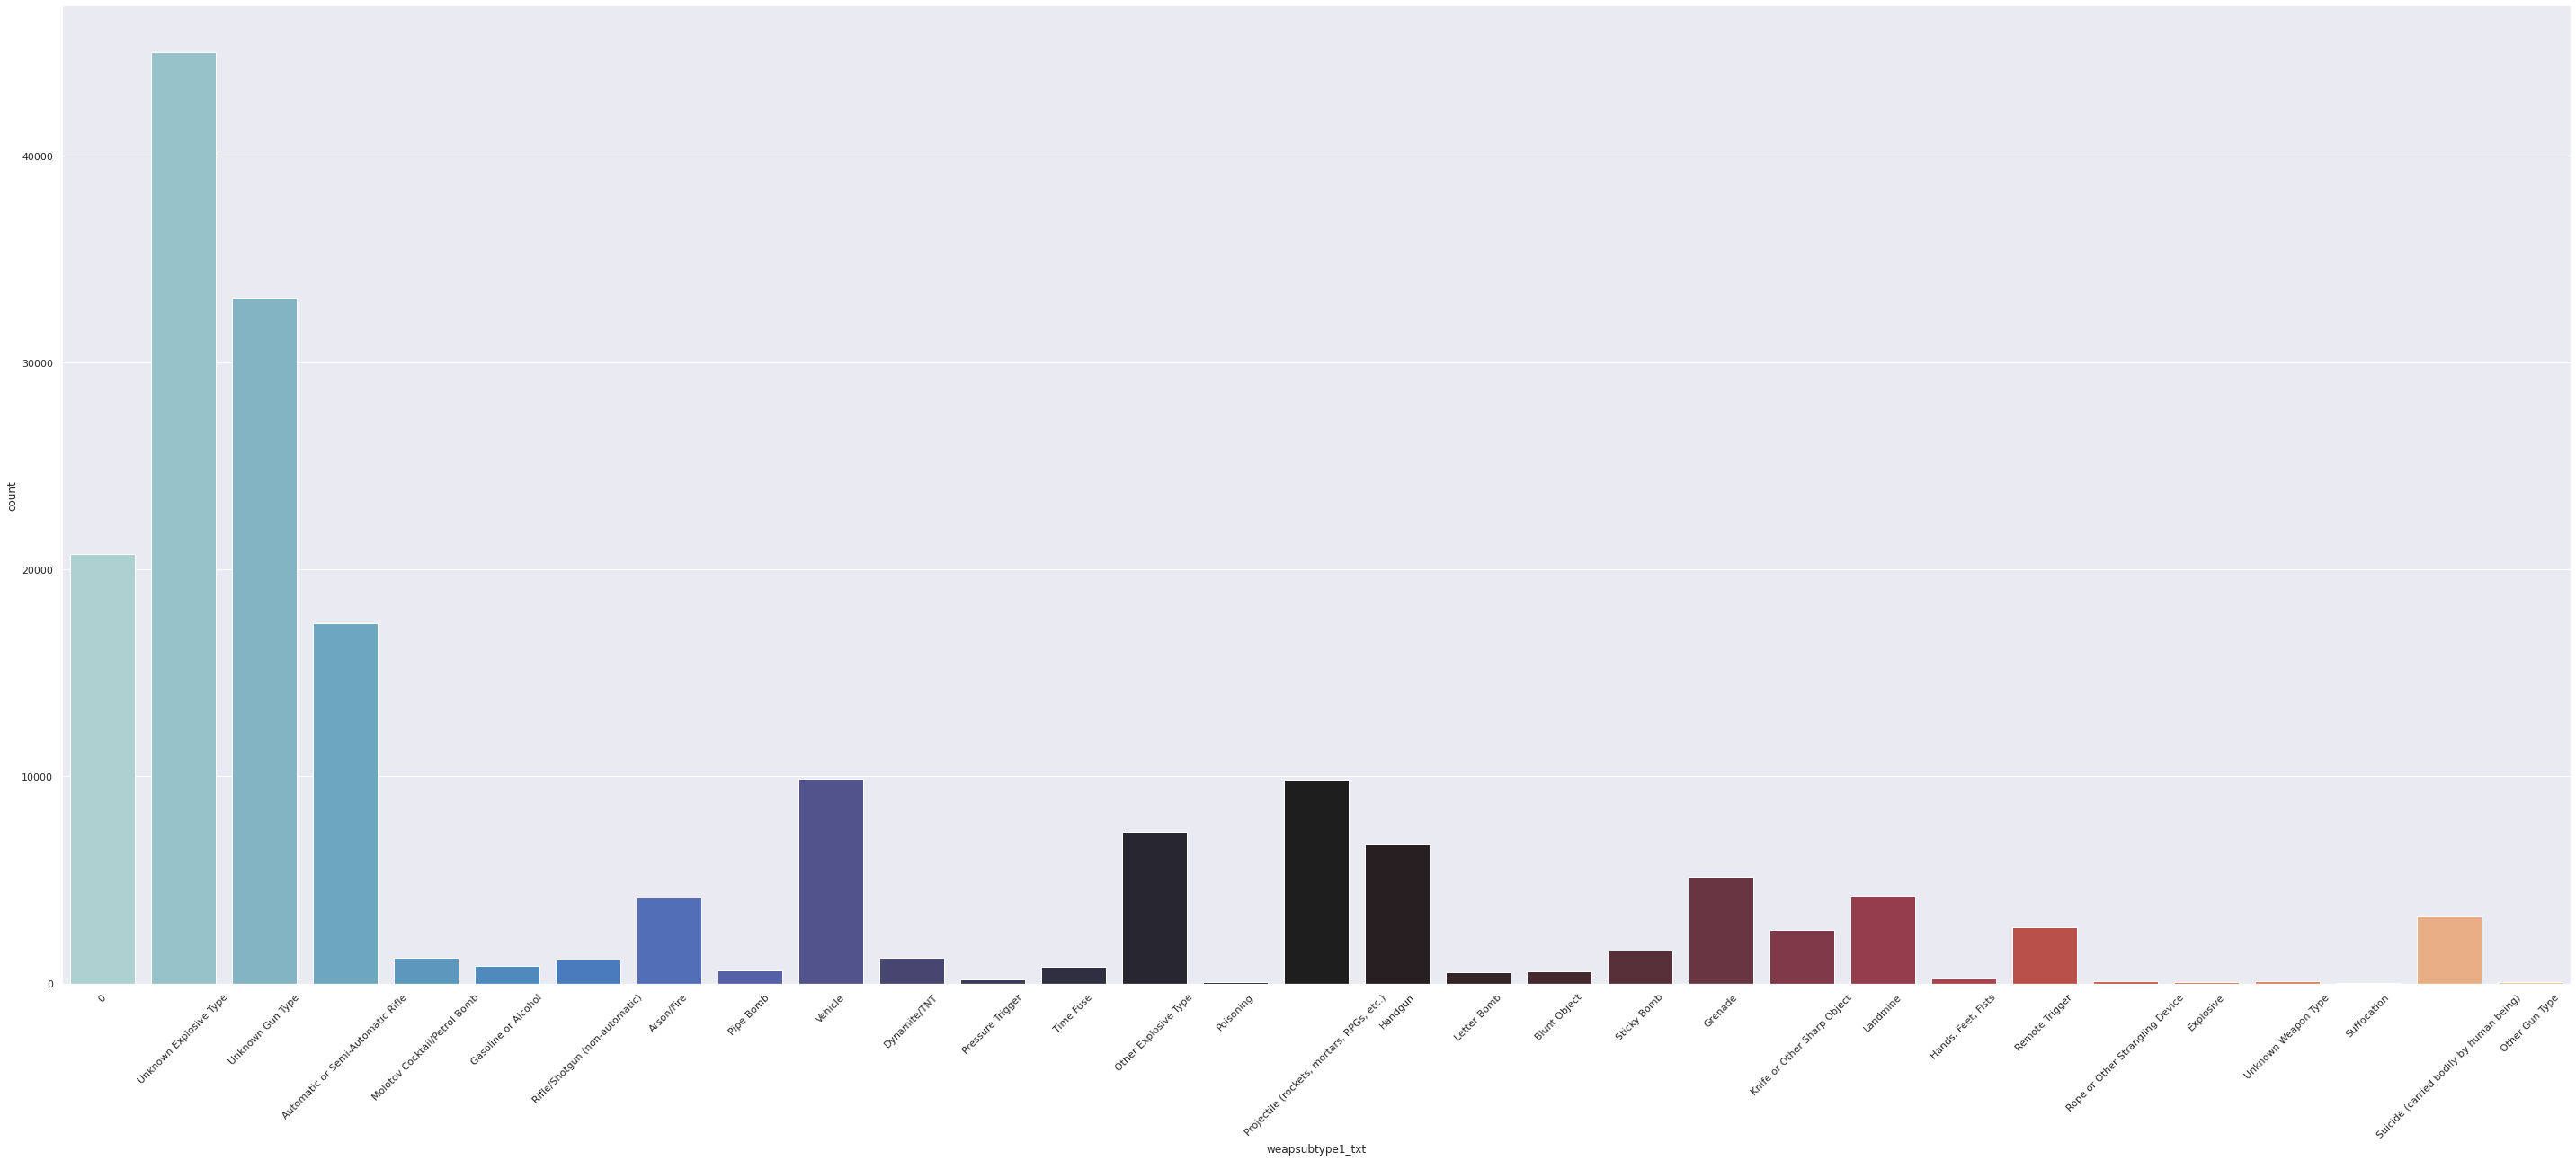

In [ ]:
plt.figure(figsize=(50,20))
sns.countplot(x=attack.weapsubtype1_txt,palette='icefire')
plt.xticks(rotation=45)
plt.show()


# 11.Terrorist target which sector and the sub sector the most.







# Sector

In [ ]:
target_type=attack.targtype1_txt.value_counts()
target_type


Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

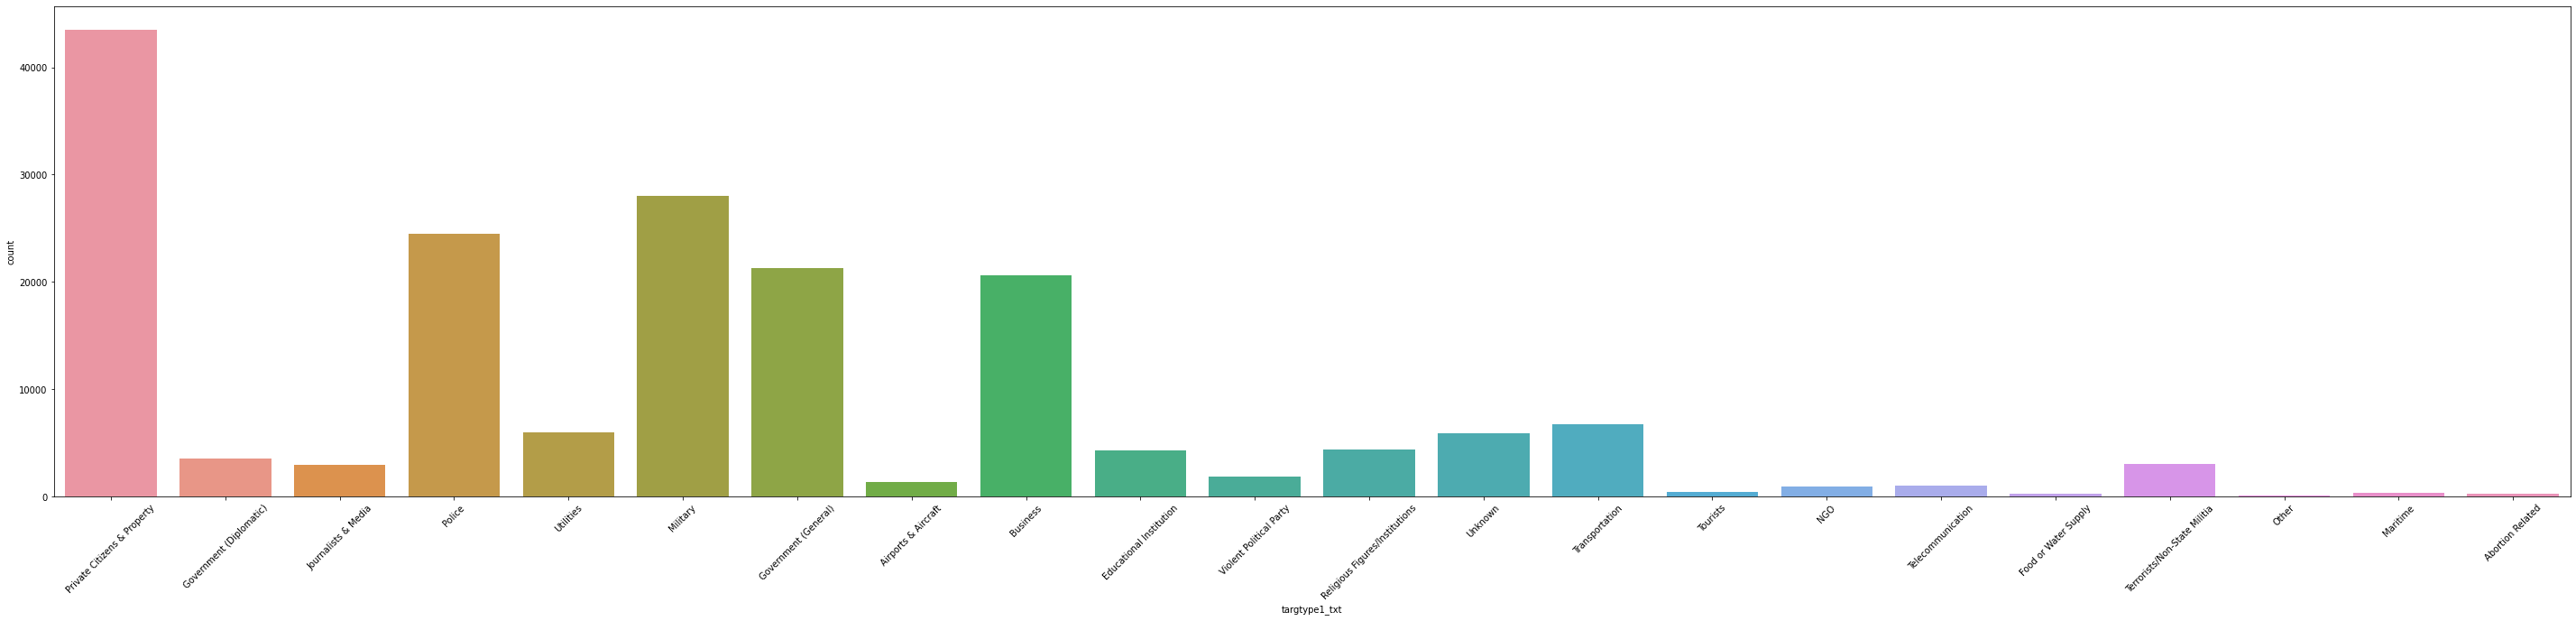

In [ ]:
plt.figure(figsize=(50,10))
sns.countplot(x=attack.targtype1_txt)
plt.xticks(rotation=45)
plt.show()

# Sub Sector

In [ ]:
target_subtype=attack.targsubtype1_txt.value_counts()
target_subtype



Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
0                                                          10373
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
                                                           ...  
Multiple Telecommunication Targets                            31
Fire Fighter/Truck                                            27
Oil Tanker                                                    19
Personnel                                                     19
Internet Infrastructure                                       12
Name: targsubtype1_txt, Length: 113, dtype: int64

Text(0.5, 0, 'target_subtypes')

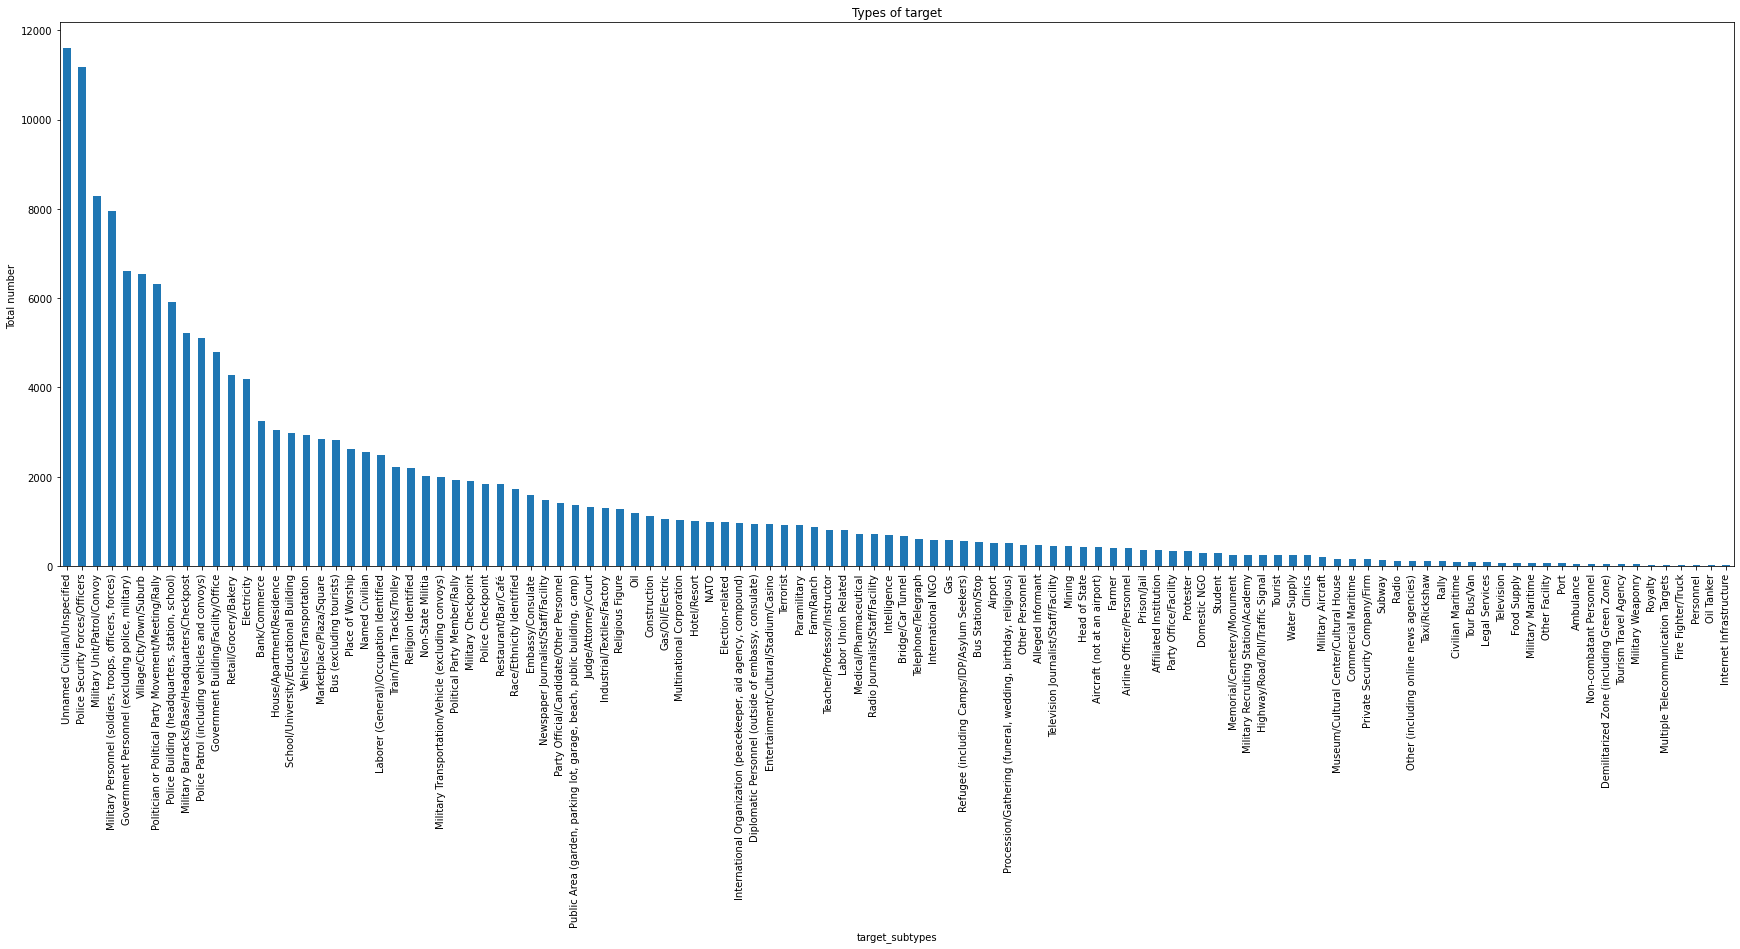

In [ ]:
plt.rcParams['figure.figsize'] = (30, 10)
target_subtype.plot(kind='bar')

plt.title('Types of target')
plt.ylabel('Total number ')
plt.xlabel('target_subtypes')

## Comparison between target type and target subtype

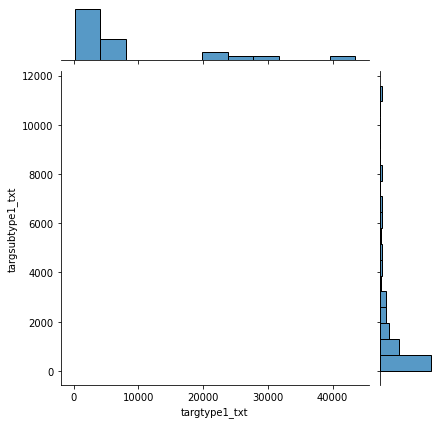

In [ ]:
sns.jointplot(x=target_type, y=target_subtype, data=attack)


# 12.Top Most Terrorists gangs operating in countries

In [ ]:
no_of_attack_country=attack[["gname","country_txt"]].value_counts().drop("Unknown")
no_of_attack_country

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


gname                                             country_txt
Taliban                                           Afghanistan    7423
Islamic State of Iraq and the Levant (ISIL)       Iraq           4797
Shining Path (SL)                                 Peru           4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador    3330
Al-Shabaab                                        Somalia        2867
                                                                 ... 
Anti-Iran Government Exiles                       Germany           1
Left-Wing Terrorists                              Bolivia           1
                                                  Brazil            1
                                                  Colombia          1
leftist guerrillas-Bolivarian militia             Colombia          1
Length: 5171, dtype: int64

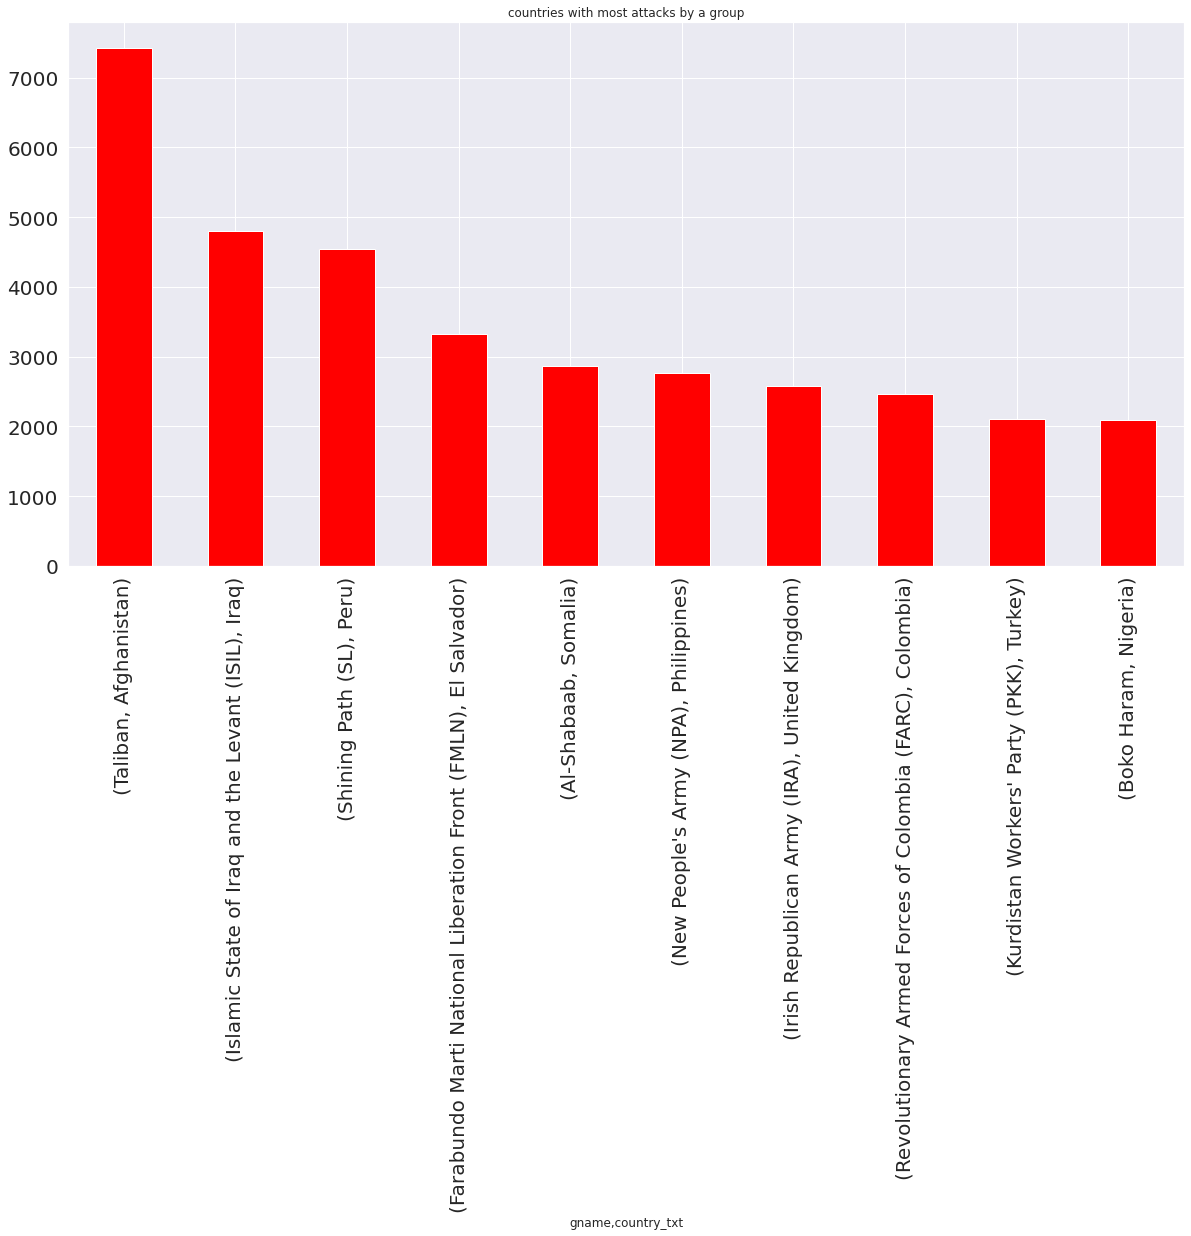

In [ ]:
no_of_attack_country.head(10).plot(kind="bar",figsize=(20,10),color="red")
plt.title("countries with most attacks by a group")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.xlabel("(terrorist group,country)")
#plt.ylabel("number of attacks")
plt.show()

# 13.Gangs operating in different regions

In [ ]:
gang_name = attack.groupby(['region_txt','gname'])['gname'].count().unstack()
gang_name.fillna(value = 0,
          inplace = True)

In [ ]:
attack.groupby(['region_txt','gname'])['region_txt'].count()

region_txt             gname                                    
Australasia & Oceania  Anarchists                                    1
                       Animal Liberation Front (ALF)                 2
                       Anti-Government extremists                    2
                       Anti-Iran Government Exiles                   1
                       Anti-Nuclear extremists                       4
                                                                    ..
Western Europe         Yellow Organization of Air Force Officers     3
                       Young Brigade of Navarro                      1
                       Youth Action Group                            6
                       Youths                                       11
                       Zero Tolerance                                5
Name: region_txt, Length: 4116, dtype: int64

In [ ]:
gang_name.columns
a=gang_name.iloc[:,:10]
a

gname,1 May,14 K Triad,14 March Coalition,14th of December Command,15th of September Liberation Legion,16 January Organization for the Liberation of Tripoli,1920 Revolution Brigades,19th of July Christian Resistance Brigade,1st of May Group,2 April Group
region_txt,,,,,,,,,,
Australasia & Oceania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Central America & Caribbean,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Central Asia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
East Asia,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eastern Europe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Middle East & North Africa,0.0,0.0,1.0,0.0,0.0,24.0,2.0,0.0,0.0,0.0
North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
South America,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0
South Asia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


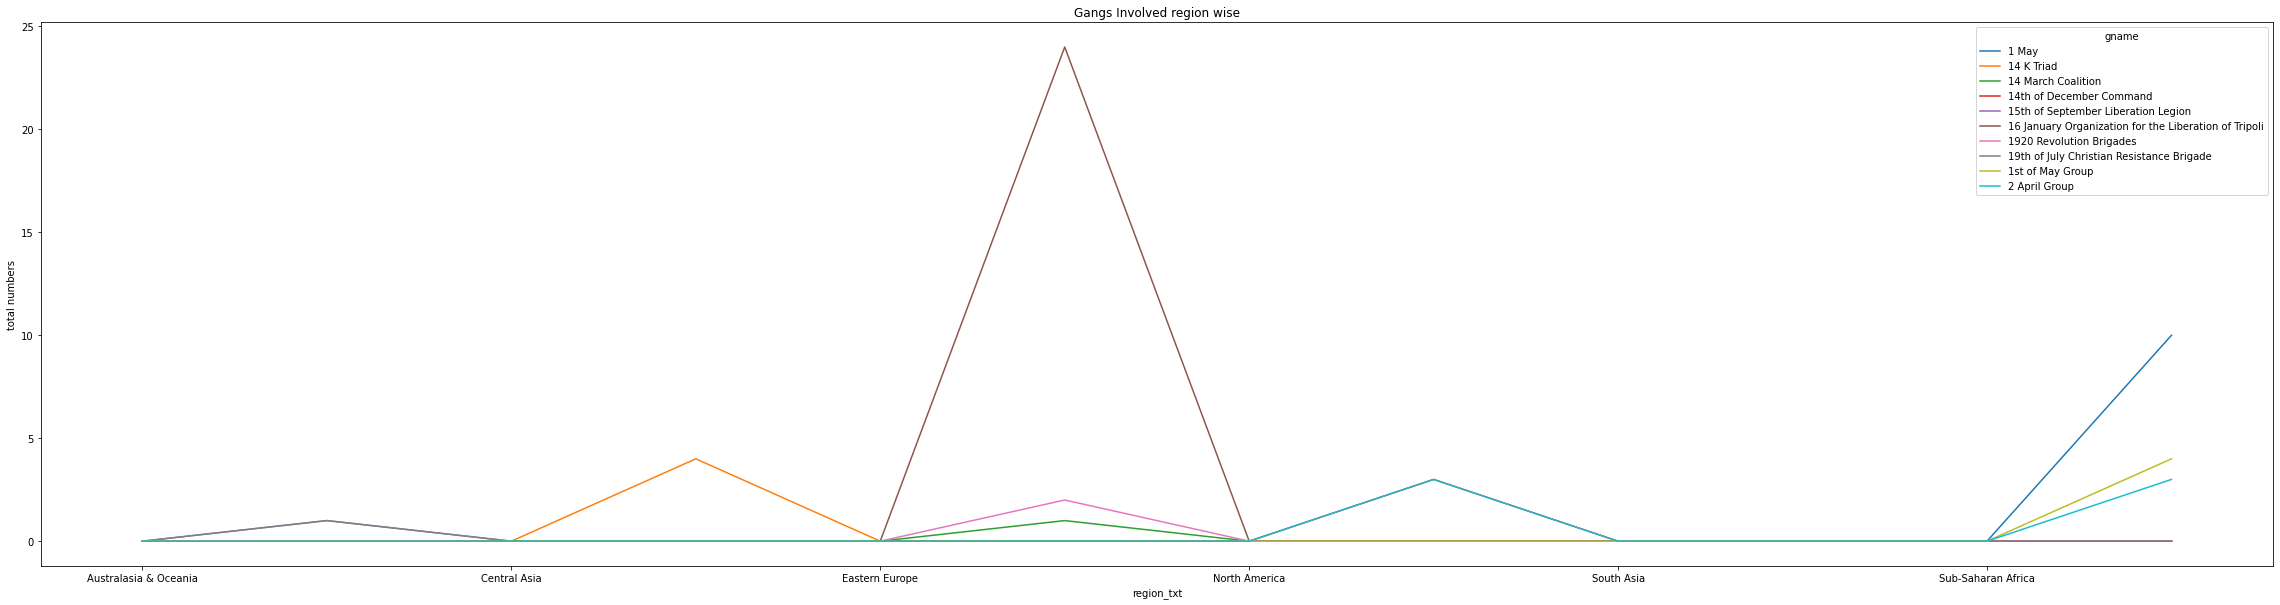

In [ ]:
a.plot()
plt.title('Gangs Involved region wise')
plt.ylabel('total numbers')
#plt.xlabel('region')
plt.rcParams['figure.figsize'] = (40, 10)

# Numbers of attacks happened in India

In [ ]:
df_India= attack[attack['country_txt']=='India']
df_number_of_attacks_by_years =df_India['iyear'].value_counts().rename_axis('iyear').reset_index(name='number_of_attacks')
df_number_of_attacks_by_years.head()

,iyear,number_of_attacks
0,2016,1025
1,2017,966
2,2015,884
3,2014,860
4,2013,694


Text(0.5, 1.0, 'Number of Attacks Each Year in India')

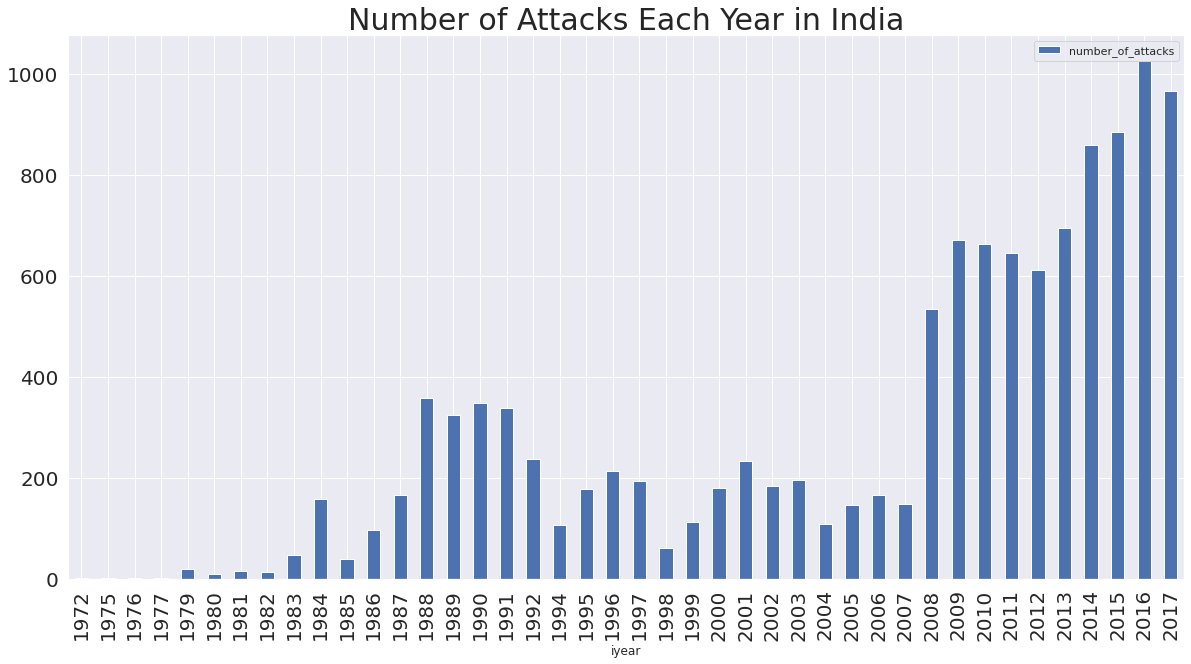

In [ ]:
plt.rcParams['figure.figsize']=(20,10)
df_number_of_attacks_by_years.sort_values('iyear',ascending= True).plot(kind='bar',x='iyear',y='number_of_attacks')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.xlabel('Year', fontsize=20)
#plt.ylabel('Number_of-Attacks', fontsize=20)
plt.title('Number of Attacks Each Year in India', fontsize=30)

#14.Number of people killed,wound,kidhost.

In [ ]:
kill=attack[["region_txt","nkill","nwound","nhostkid"]].groupby("region_txt").sum()
kill

,nkill,nwound,nhostkid
region_txt,,,
Australasia & Oceania,150.0,260.0,193.0
Central America & Caribbean,28708.0,8991.0,16566.0
Central Asia,1000.0,2009.0,33.0
East Asia,1152.0,9213.0,623.0
Eastern Europe,7415.0,12045.0,5999.0
Middle East & North Africa,137642.0,214308.0,27755.0
North America,4916.0,21531.0,-878.0
South America,28849.0,16704.0,-14781.0
South Asia,101319.0,141360.0,19959.0


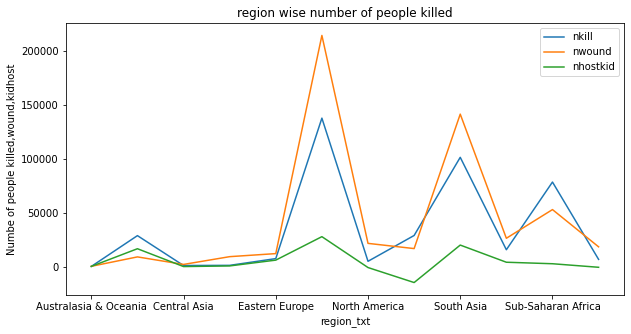

In [ ]:
kill.plot()
plt.rcParams['figure.figsize'] = (50, 20)
plt.title('region wise number of people killed')
#plt.xlabel("region text")
plt.ylabel('Numbe of people killed,wound,kidhost')
plt.show()

# 15.Total humans affected by terrorist attacks from 1970 to 2017

In [ ]:
attack["casualty"]=attack["nkill"]+attack["nwound"]
attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   country_txt       181691 non-null  object 
 2   region_txt        181691 non-null  object 
 3   city              181691 non-null  object 
 4   success           181691 non-null  int64  
 5   claimed           181691 non-null  float64
 6   suicide           181691 non-null  int64  
 7   attacktype1_txt   181691 non-null  object 
 8   targtype1_txt     181691 non-null  object 
 9   extended          181691 non-null  int64  
 10  targsubtype1_txt  181691 non-null  object 
 11  gname             181691 non-null  object 
 12  motive            181691 non-null  object 
 13  weaptype1_txt     181691 non-null  object 
 14  nkill             181691 non-null  float64
 15  nwound            181691 non-null  float64
 16  property          18

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Casualty=attack.loc[:,"casualty"].sum()
print(f"Total number of casualties due to terrorist attack across the world is {Casualty}")
casualty_count=attack[["iyear","casualty"]].groupby("iyear").sum()
casualty_count.head()

Total number of casualties due to terrorist attack across the world is 935737.0


,casualty
iyear,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


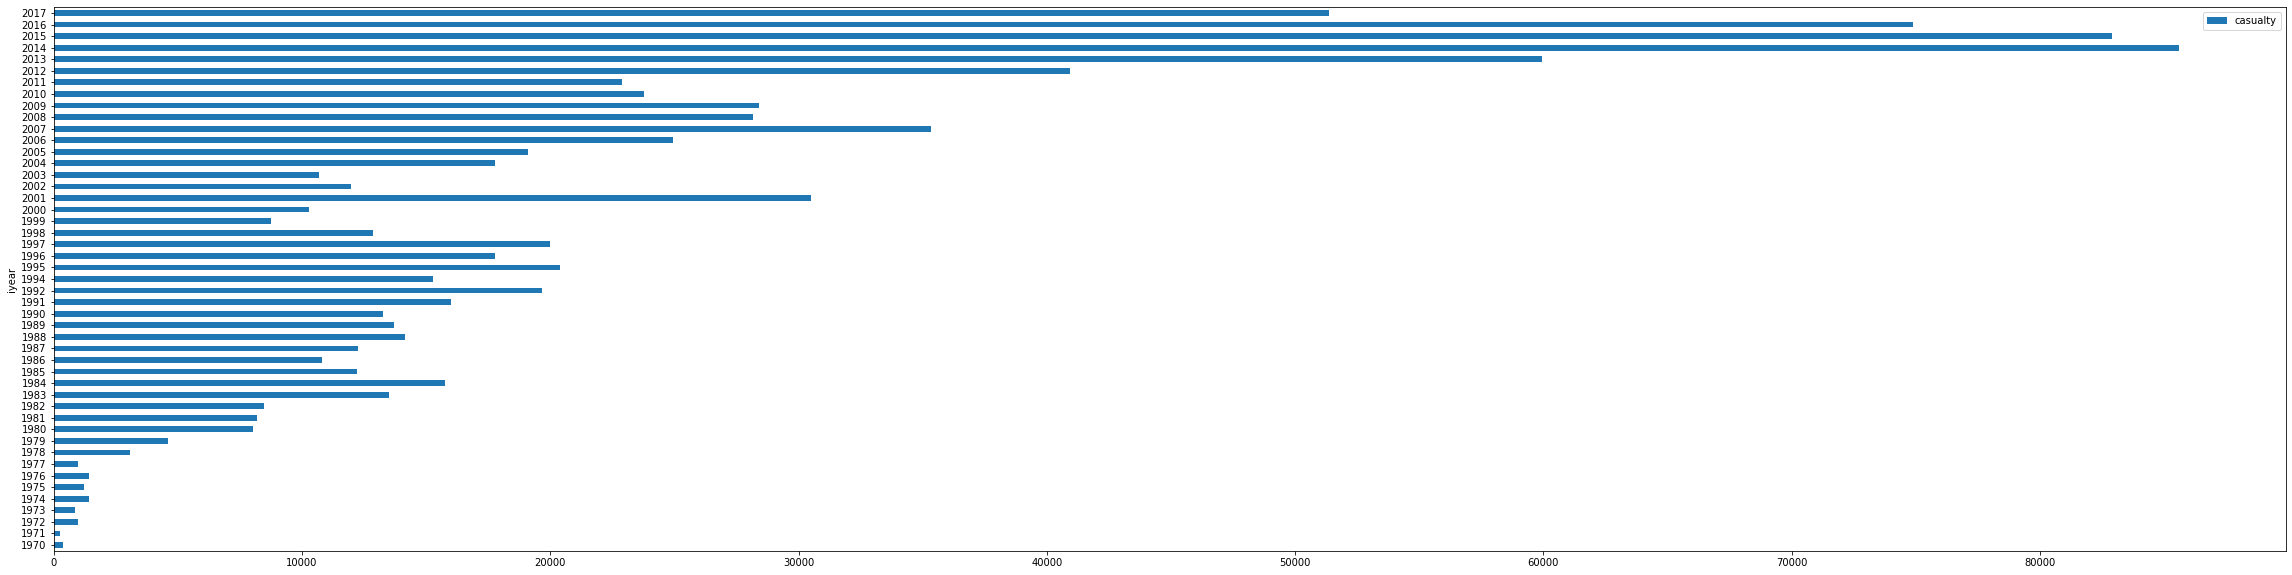

In [ ]:
# sns.lineplot(x = "iyear", y = "casualty", data = attack)
# plt.xticks(rotation = 25)
casualty_count.plot(kind="barh", fontsize=10)

In [ ]:
killed=attack.loc[:,"nkill"].sum()
print(f"Total number of kills due to terrorist attack across the world is {killed}")
kill_count=attack[["iyear","nkill"]].groupby("iyear").sum()
kill_count.head()


Total number of kills due to terrorist attack across the world is 411868.0


,nkill
iyear,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


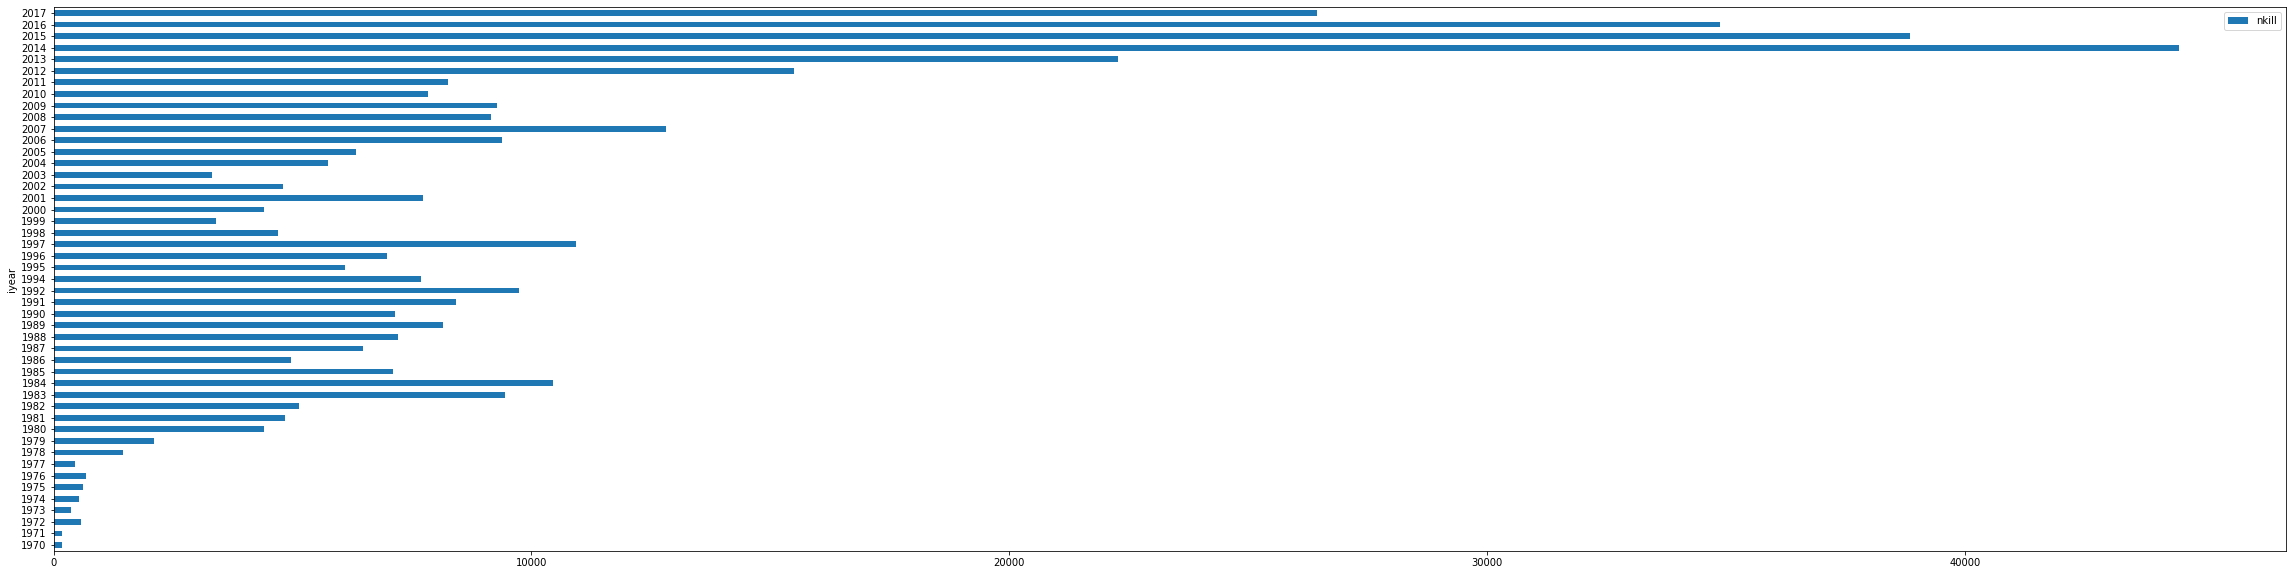

In [ ]:
kill_count.plot(kind="barh", fontsize=10)

In [ ]:
wound=attack.loc[:,"nwound"].sum()
print(f"Total number of wounds due to terrorist attack across the world is {wound}")
wound_count=attack[["iyear","nwound"]].groupby("iyear").sum()
wound_count.head()

Total number of wounds due to terrorist attack across the world is 523869.0


,nwound
iyear,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


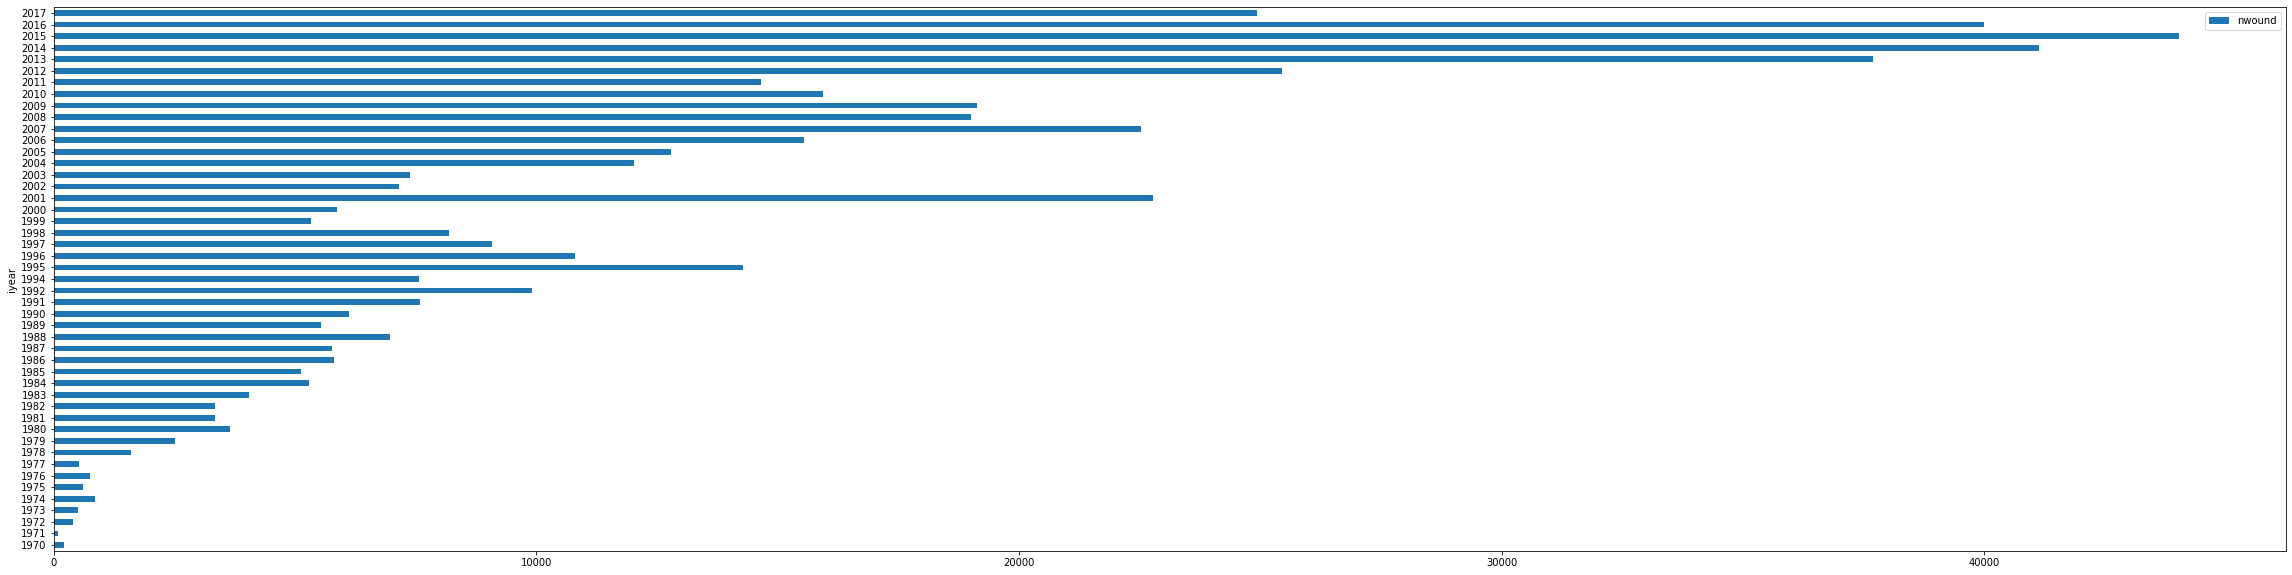

In [ ]:
wound_count.plot(kind="barh", fontsize=10)

In [ ]:
attack.describe()

,iyear,imonth,iday,success,claimed,suicide,extended,nkill,nwound,property,nhostkid,vicinity
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,0.889598,0.031592,0.036507,0.045346,2.266860,2.883296,-0.544556,0.338624,0.068297
std,13.259430,3.388303,8.814045,0.313391,0.872204,0.187549,0.208063,11.227057,34.309747,3.122889,55.306010,0.284553
min,1970.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-99.000000,-9.000000
25%,1991.000000,4.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1570.000000,8191.000000,1.000000,17000.000000,1.000000


# Correlation Analysis

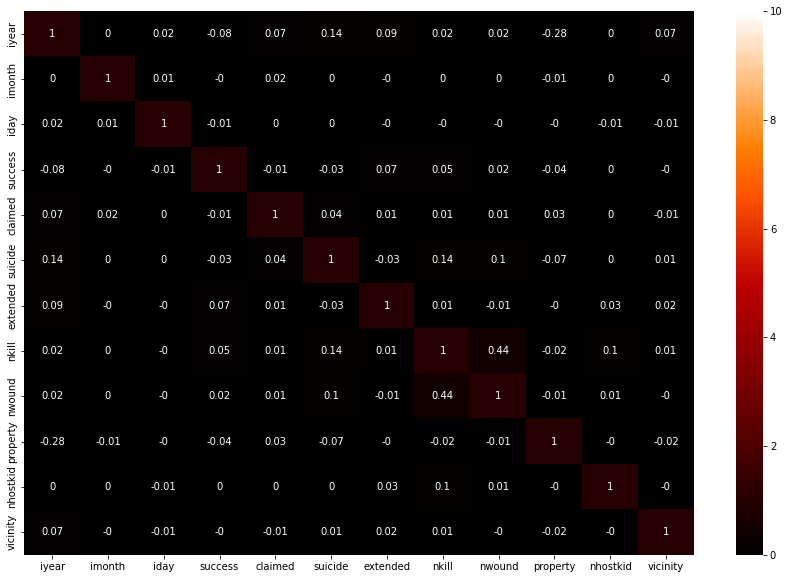

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(np.round(attack.corr(),2),annot=True,vmin=0,vmax=10,cmap="gist_heat")

# We conclude the report with an indepth review of the data given to us via a descriptive analysis of key variables of interests.The analysis is intended to give different insights about terrorists attacks happens in different regions.